<a href="https://colab.research.google.com/github/Andru-1987/74235-_DataScience_I/blob/main/clase_8/linear-ejemplo-real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresion lineal

##Sección 1- Presentación del problema específico

### 💼 Empezar tu carrera en IT puede ser abrumador… pero no estás solo

Si sos un joven profesional recién graduado y estás buscando tu primer trabajo en el sector IT, seguramente te sientas desbordado por la cantidad de información disponible. ¿Qué empresas ofrecen buenas condiciones? ¿Dónde se paga mejor? ¿Cómo saber si estás recibiendo un salario justo?

👉 ¡Estamos acá para ayudarte!

Hemos desarrollado una herramienta colaborativa que te permite **calificar empresas** en las que trabajaste, **compartir tus experiencias** con otros profesionales y acceder a información clave sobre el mercado laboral en tecnología.

Además, realizamos una investigación profunda sobre el estado actual del empleo en IT, analizando miles de datos para responder las preguntas que más te preocupan:

* ¿Qué empresas tienen mejor reputación entre jóvenes talentos?
* ¿Cómo varían los salarios según experiencia, rol o género?
* ¿Qué tan inclusivo y equitativo es el sector?

### 📊 Lo que encontramos

Nuestro estudio revela algunas desigualdades preocupantes:

* Una **brecha de género persistente**, especialmente en roles de liderazgo.
* **Diferencias salariales** marcadas según la antigüedad y el género.
* Y una necesidad urgente de mayor transparencia en las condiciones laborales.

Pero también encontramos señales de cambio: muchas empresas están tomando medidas concretas para mejorar sus prácticas, y hay una comunidad creciente de profesionales comprometidos con un futuro más justo.

### 🚀 ¿Por qué te sirve esto?

Nuestro informe está diseñado para vos: **visualizaciones claras**, **análisis accesibles** y recomendaciones prácticas que te ayudarán a tomar decisiones informadas sobre tu carrera.



### **Datos utilizados**

Los datos empleados en este estudio provienen de **encuestas de sueldos realizadas en 2020** a profesionales del sector tecnológico en **la ciudad de Buenos Aires y el conurbano bonaerense**. Estas encuestas fueron diseñadas y ejecutadas por un equipo especializado en recursos humanos y análisis de datos, con el objetivo de relevar información detallada sobre **salarios, experiencia, posición laboral, industria y otros factores asociados a la remuneración**.

Antes de su análisis, los datos fueron sometidos a un proceso riguroso de **limpieza y depuración**, que incluyó:

* Eliminación de columnas con alto porcentaje de valores faltantes.
* Renombramiento de variables con etiquetas poco claras.
* Detección y remoción de outliers.
* Selección de variables más relevantes mediante análisis de correlación.

Este tratamiento permitió mejorar la **calidad, consistencia y relevancia del conjunto de datos**, garantizando una base sólida para explorar la distribución salarial y detectar posibles inequidades en el sector tecnológico argentino.


#Sección 2- Preguntas que buscamos responder

**2.1 Hipótesis**

2.1.1 Hipótesis 1: Los hombres al menos triplican en cantidad de profesionales a las mujeres

2.1.2 Hipótesis 2: La mayor cantidad de los profesionales se encuentran entre los 30 y 40 años

2.1.3 Hipótesis 3: Existe inequidad de género porque los hombres tienen un salario mayor a las mujeres

2.1.4 Hipótesis 4: Los salarios más altos corresponden a los técnicos con mayor cantidad de años de experiencia

2.1.5 Hipótesis 5: Las personas que mantienen sus puestos de trabajo poseen mayores salarios que los profesionales que recién ingresan a las empresas. Se va a comparar a las personas que tienen menos de 5 años en un mismo puesto


**2.2 Conclusiones Hipótesis**

2.1.1 Hipótesis 1: Verdadero. Prácticamente hay 5 veces más hombres que mujeres en el sector

2.1.2 Hipótesis 2: Falso. La mayor cantidad de los profesionales se encuentran entre los 25 y 35 años

2.1.3 Hipótesis 3: Verdadero. Prácticamente el salario promedio de un hombre es 20% mayor al de una mujer promedio

2.1.4 Hipótesis 4: Dudoso. Los salarios más altos corresponden a los técnicos que poseen más de 10 años de experiencia. Luego hay un estancamiento en el salario. Es decir, que una persona que tiene 20 años no suele ganar más que una que tiene 10 años

2.1.5 Hipótesis 5: Falso. No se puede identificar una correlación entre los salarios y el tiempo de pertenencia en un puesto laboral

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_table_csv = "https://raw.githubusercontent.com/eea-uba/EEA-2022/main/Fuentes/Encuesta%20de%20remuneracion%20salarial%20-%202020.1.csv"

In [3]:
df = pd.read_csv(raw_table_csv, index_col=0)
df.head()

,Me identifico,Tengo,Estoy trabajando en,Dónde estás trabajando,Bolivia,Chile,Colombia,Cuba,Costa Rica,Ecuador,...,¿A qué eventos de tecnología asististe en el último año?,¿Sos miembro de alguna comunidad IT?,Cantidad de empleados,Actividad principal,¿La recomendás como un buen lugar para trabajar?,¿Cómo calificás las políticas de diversidad e inclusión?,¿A cuántos kilómetros de tu casa queda la oficina?,Beneficios extra,¿Habías respondido nuestra encuesta en ediciones anteriores?,"¿Cuáles considerás que son las mejores empresas de IT para trabajar en este momento, en tu ciudad?"
Timestamp,,,,,,,,,,,,,,,,,,,,,
1/31/2020 6:50:26,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10001+,Producto basado en Software,8,10,6.0,"Capacitaciones y/o cursos, Comidas pagas / sub...",No,cognizant
1/28/2020 9:27:48,Hombre,30,Argentina,Ciudad Autónoma de Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,51-100,Otras industrias,7,3,35.0,Capacitaciones y/o cursos,No,mercadolibre
1/29/2020 16:54:29,Mujer,40,Argentina,Ciudad Autónoma de Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,8,8,30.0,"Abono de celular y/o Internet, Capacitaciones ...",No,NaN
2/1/2020 5:46:25,Mujer,36,Argentina,Ciudad Autónoma de Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,51-100,Otras industrias,7,5,4.0,Viáticos,No,NaN
2/1/2020 17:51:21,Hombre,29,Argentina,Ciudad Autónoma de Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11-50,Otras industrias,5,8,7.0,Ninguna de las anteriores,No,NaN


In [4]:
#Cambio nombre de Me identifico por Genero

df.rename(columns= {"Me identifico":"Genero"}, inplace = True)

#Cambio nombre de Tengo por Edad
df.rename(columns= {"Tengo":"Edad"}, inplace = True)

#Quito lo de tu moneda local

df.rename(columns= {"Salario mensual BRUTO (en tu moneda local)":"SalarioB"}, inplace = True)


df.rename(columns= {"Salario mensual NETO (en tu moneda local)":"SalarioN"}, inplace = True)


#Borrar varias columnas que no tienen datos, todos trabajan en Argentina
df = df.drop(columns=['SalarioN', 'Estoy trabajando en', 'Dónde estás trabajando','Bolivia', 'Chile', 'Colombia', 'Cuba', 'Costa Rica', 'Ecuador','El Salvador', 'Guatemala', 'Honduras', 'México', 'Nicaragua', 'Panamá',
'Paraguay', 'Perú', 'Puerto Rico', 'República Dominicana', 'Uruguay', 'Venezuela'])

df.columns

Index(['Genero', 'Edad', 'Años de experiencia', 'Años en la empresa actual',
       'Años en el puesto actual', '¿Gente a cargo?',
       'Nivel de estudios alcanzado', 'Estado', 'Carrera', 'Universidad',
       'Realizaste cursos de especialización',
       '¿Contribuís a proyectos open source?', '¿Programás como hobbie?',
       'Trabajo de', 'Plataformas', 'Lenguajes de programación',
       'Frameworks, herramientas y librerías', 'Bases de datos',
       'QA / Testing', 'IDEs', '¿Qué SO usás en tu laptop/PC para trabajar?',
       '¿Y en tu celular?', '¿Tenés guardias?', 'Cuánto cobrás por guardia',
       '¿Porcentaje, bruto o neto?', 'Tipo de contrato', 'SalarioB',
       '¿Qué tan conforme estás con tu sueldo?',
       'Cómo creés que está tu sueldo con respecto al último semestre',
       'Recibís algún tipo de bono', 'A qué está atado el bono',
       '¿Tuviste ajustes por inflación en 2019?',
       '¿De qué % fue el ajuste total?', '¿En qué mes fue el último ajuste?',
      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5982 entries, 1/31/2020 6:50:26 to 2/2/2020 4:45:31
Data columns (total 48 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   Genero                                                                                              5982 non-null   object 
 1   Edad                                                                                                5982 non-null   int64  
 2   Años de experiencia                                                                                 5982 non-null   float64
 3   Años en la empresa actual                                                                           5982 non-null   float64
 4   Años en el puesto actual                                                                   

**Hipotesis 1**

*Hipotesis 1: Los hombres al menos triplican en cantidad de profesionales a las mujeres*

**Conclusión 1**

*Hipotesis 1: Verdadero. Prácticamente hay 5 veces más hombres que mujeres en el sector*


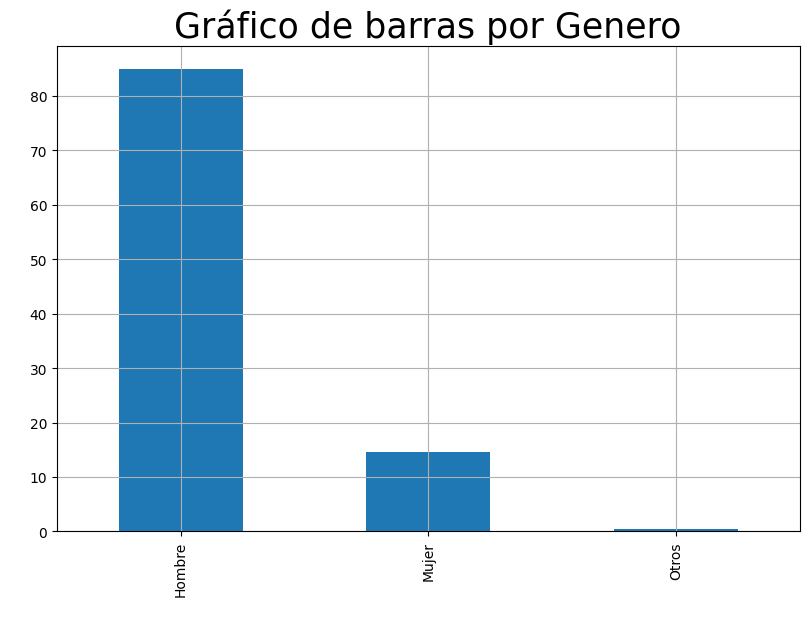

In [6]:
fig = plt.figure(figsize=(8, 6))
(df["Genero"].value_counts(normalize=True)*100).plot(kind="bar")
plt.tight_layout() #evitar el superposicionamiento
plt.title("Gráfico de barras por Genero", color='black', fontsize=25)
plt.xlabel("Genero", color='white')
plt.ylabel("Porcentaje", color="white")
plt.grid(True) #Para en forma de cuadricula
fig.set_facecolor("white")

**2.1.2 Hipotesis 2**

*Hipotesis 2: La mayor cantidad de los profesionales se encuentran entre los 30 y 40 años*

**Conclusión 2**

*Hipotesis 2: Falso. La mayor cantidad de los profesionales se encuentran entre los 25 y 35 años*




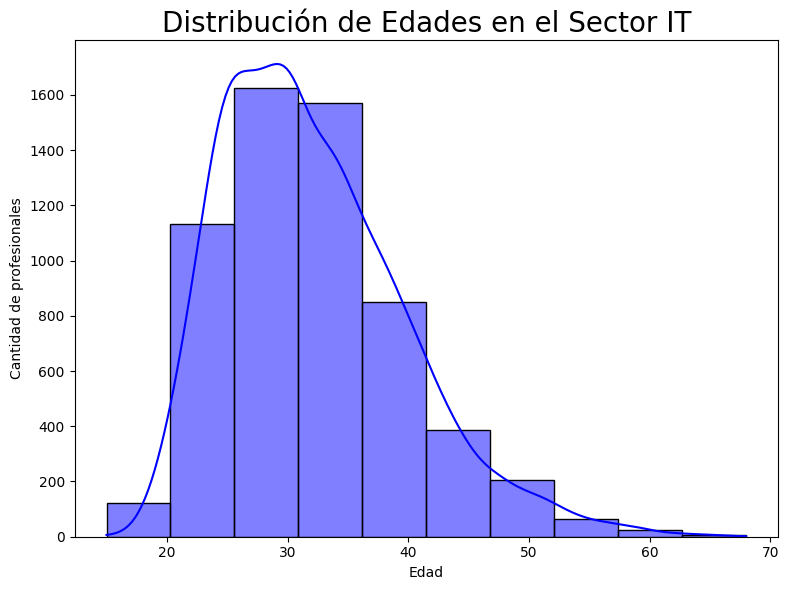

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df["Edad"], bins=10, color="blue", kde=True, edgecolor="black")

plt.title("Distribución de Edades en el Sector IT", color='black', fontsize=20)
plt.xlabel("Edad")
plt.ylabel("Cantidad de profesionales")
plt.gcf().set_facecolor("white")  # Establece fondo blanco
plt.tight_layout()
plt.show()


---
**Analisis Bivariado**

El código presentado realiza un análisis bivariado de la distribución de la edad por género utilizando un gráfico de violín. Los violines representan la distribución de la edad para cada género y su ancho representa la densidad de la distribución en esa edad. La posición de los violines indica la mediana y la forma del violín muestra la asimetría de la distribución. Este gráfico es útil para comparar la distribución de la edad entre diferentes géneros en un solo vistazo. El código además establece el título y el tamaño del gráfico para una mejor visualización.


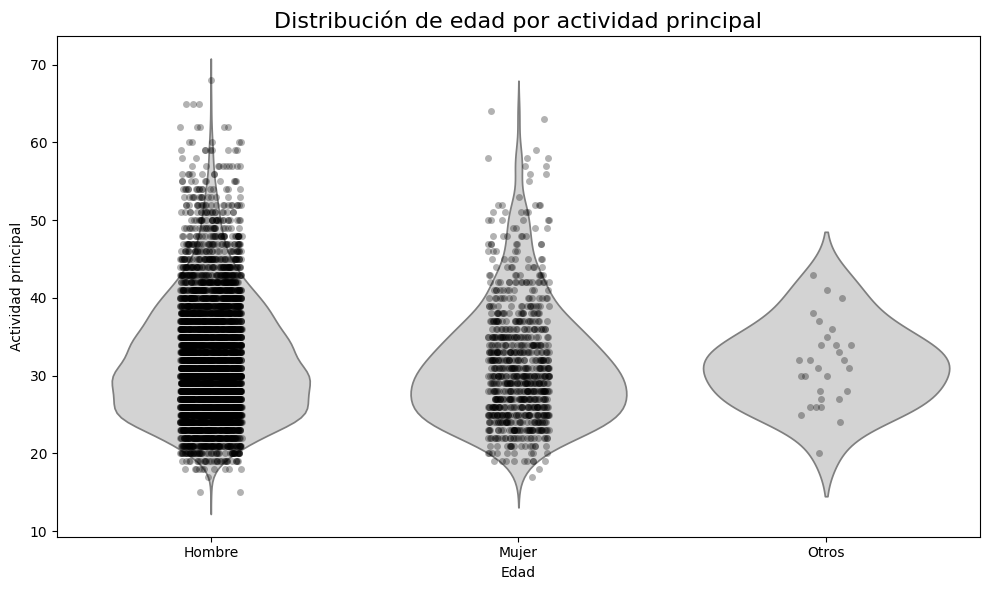

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 6))

sns.violinplot(data=df, x='Genero', y='Edad', inner=None, color="lightgray")
sns.stripplot(data=df, x='Genero', y='Edad', jitter=True, alpha=0.3, color="black")

plt.title("Distribución de edad por actividad principal", color='black', fontsize=16)
plt.xlabel("Edad")
plt.ylabel("Actividad principal")

fig.set_facecolor("white")
plt.tight_layout()
plt.show()



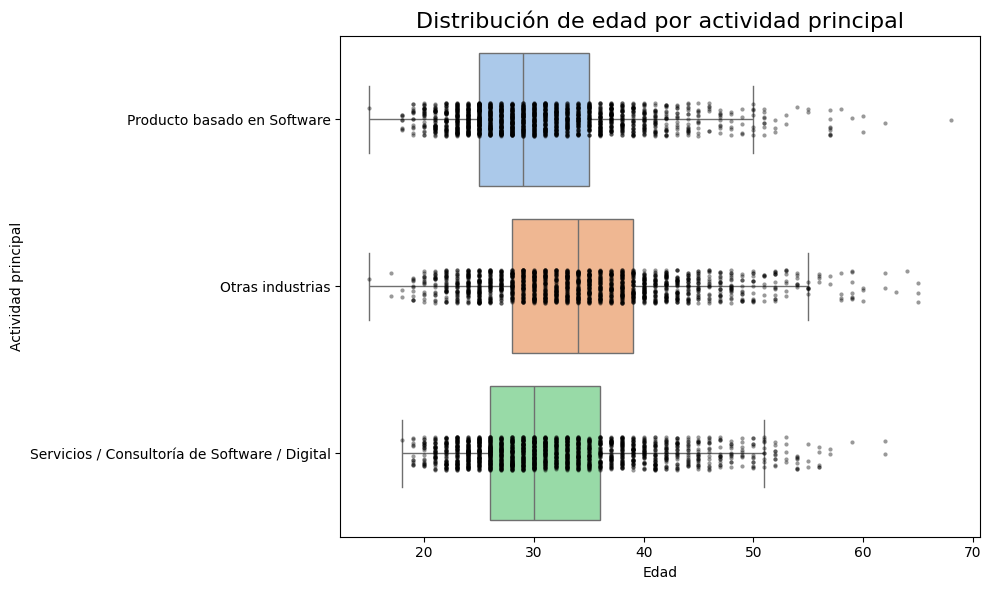

In [9]:
fig = plt.figure(figsize=(10, 6))

# Boxplot base (resumen estadístico)
sns.boxplot(
    data=df,
    x='Edad',
    y="Actividad principal",
    hue="Actividad principal",
    palette="pastel",
    fliersize=0,
    legend=False
)

# Stripplot encima (datos individuales)
sns.stripplot(
    data=df,
    x='Edad',
    y="Actividad principal",
    color="black",
    size=3,
    jitter=True,
    alpha=0.4
)

plt.title("Distribución de edad por actividad principal", fontsize=16, color="black")
plt.xlabel("Edad")
plt.ylabel("Actividad principal")
fig.set_facecolor("white")
plt.tight_layout()
plt.show()


 Se puede observar que la mediana de edad para el sector de "otras industrias" está ligeramente por encima de los otros dos grupos, que son "comercio" e "industria manufacturera". Sin embargo, la diferencia en la mediana es de solo 2 o 3 años, lo que sugiere que la edad no es un factor determinante en la elección de la actividad laboral en el sector.

El gráfico de barras apiladas mejora la presentación visual de la información, permitiendo una mejor comparación entre las diferentes actividades y géneros. En este caso, podemos ver que las actividades tienen porcentajes similares en cada género, pero la cantidad de hombres es significativamente superior a la de mujeres en el sector.

El análisis bivariado nos permite visualizar de manera clara la diferencia en la distribución de género en cada actividad y cómo estas se comparan entre sí. El gráfico de barras apiladas nos muestra la relación entre dos variables categóricas, género y actividad principal. La altura de cada barra representa la proporción de hombres y mujeres en cada actividad, y la longitud de la barra representa la proporción de personas que se dedican a esa actividad.

En este caso, podemos ver que las actividades tienen porcentajes similares en cada género, pero la cantidad de hombres es significativamente superior a la de mujeres en el sector.

Este gráfico nos permite visualizar de manera clara la diferencia en la distribución de género en cada actividad y cómo estas se comparan entre sí. Además, la leyenda nos permite identificar fácilmente qué color representa a cada género y tener una mejor comprensión del gráfico en su totalidad.


<Figure size 1000x600 with 0 Axes>

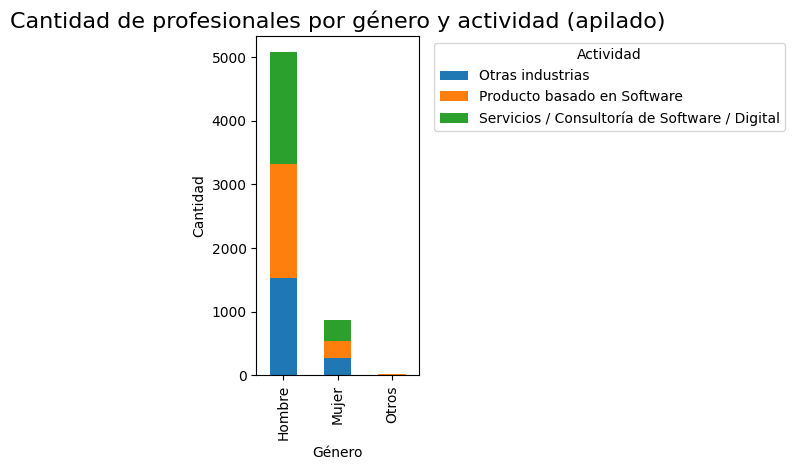

In [10]:
# Preparar los datos en formato largo

actividad_genero = df.groupby(["Genero", "Actividad principal"]).size().reset_index(name="Cantidad")
actividad_genero_pivot = actividad_genero.pivot(index="Genero", columns="Actividad principal", values="Cantidad").fillna(0)
plt.figure(figsize=(10, 6), facecolor="white")

actividad_genero_pivot.plot(kind="bar", stacked=True)

plt.title("Cantidad de profesionales por género y actividad (apilado)", fontsize=16)
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.legend(title="Actividad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**2.1.3 Hipotesis 3**

*Hipotesis 3: Existe inequidad de género porque los hombres tienen un salario mayor a las mujeres*

**Conclusión 3**

*Hipotesis 3: Verdadero. Prácticamente el salario promedio de un hombre es 20% mayor al de una mujer promedio*

Tras analizar los datos, podemos concluir que esta hipótesis es verdadera.

El salario promedio de un hombre es aproximadamente un 20% mayor que el de una mujer promedio.

Esta desigualdad salarial es un problema importante que debe ser abordado para lograr la igualdad de género en el ámbito laboral.

<Axes: xlabel='Genero', ylabel='SalarioB'>

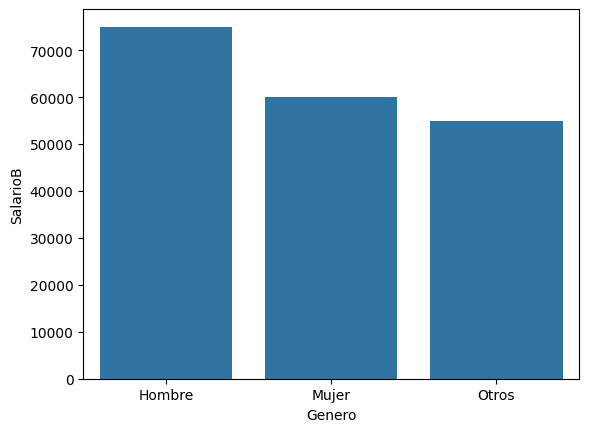

In [11]:
sns.barplot(x='Genero', y='SalarioB', data=df, estimator=np.median, errorbar=None)

### Se podria trabajar por outliers extremos con el percentil 99


<Axes: xlabel='Genero', ylabel='SalarioB'>

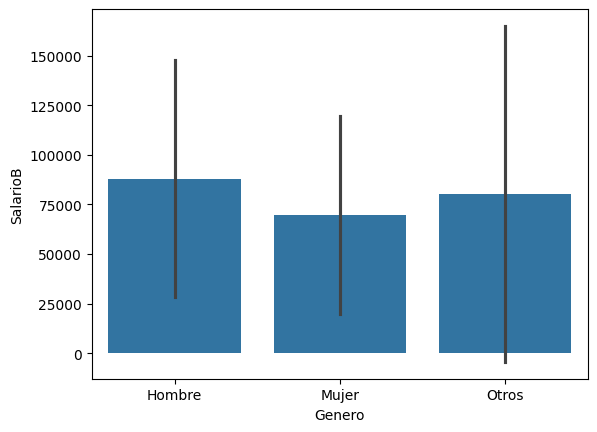

In [12]:
# Filtrar sueldos menores al percentil 99
limite = df['SalarioB'].quantile(0.99)
df_filtrado = df[df['SalarioB'] < limite]
sns.barplot(x='Genero', y='SalarioB', data=df_filtrado, estimator='mean', errorbar='sd')

In [13]:

# Crear una nueva columna 'SalarioB_cat' con 5 categorías
df['SalarioB_cat'] = pd.qcut(df['SalarioB'], q=5, labels=['Salario Muy bajo', 'Salario bajo', 'Salario medio', 'Salario Alto', 'Salario muy alto'])

# Verificar la nueva columna
print(df[['SalarioB', 'SalarioB_cat']].head(5))

                    SalarioB      SalarioB_cat
Timestamp                                     
1/31/2020 6:50:26       45.0  Salario Muy bajo
1/28/2020 9:27:48    48000.0      Salario bajo
1/29/2020 16:54:29   42000.0      Salario bajo
2/1/2020 5:46:25     75000.0     Salario medio
2/1/2020 17:51:21    40000.0  Salario Muy bajo


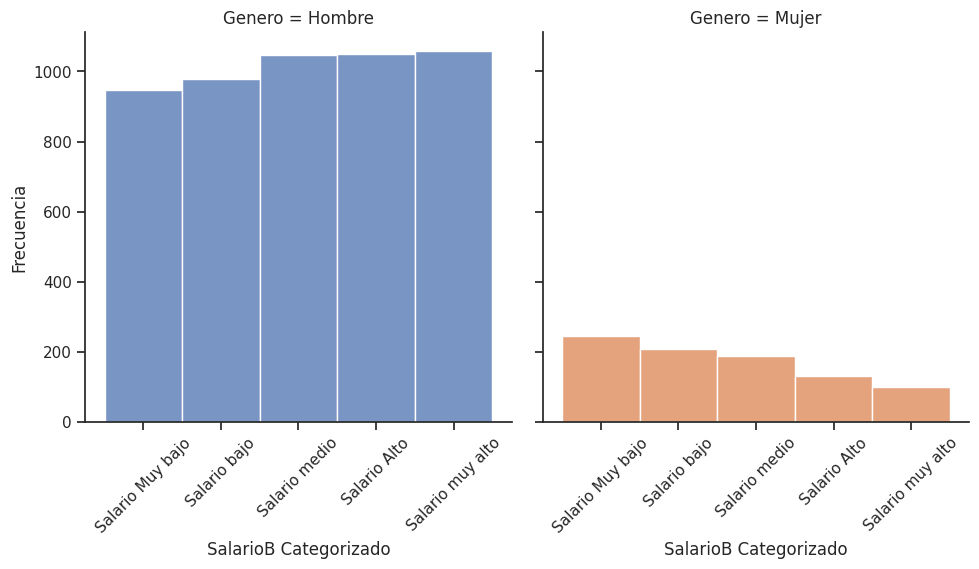

In [14]:
# Filtrar solo por las categorías Hombre y Mujer en la variable Genero
df_filtered = df[df['Genero'].isin(['Hombre', 'Mujer'])]

# Configurar el estilo de los gráficos
sns.set(style="ticks")

# Crear el grid de gráficos
g = sns.FacetGrid(df_filtered, col="Genero", hue="Genero", col_wrap=2, height=5)

# Agregar los histogramas en cada gráfico del grid
g.map(sns.histplot, "SalarioB_cat")

# Configurar la visualización
g.set(xlabel='SalarioB Categorizado', ylabel='Frecuencia')
g.set_xticklabels(rotation=45)

# Mostrar el gráfico
g.fig.suptitle('', fontsize=16)
plt.show()


En el eje X se encuentra la categoría de salario, mientras que en el eje Y se encuentra la frecuencia o la cantidad de personas en cada categoría de salario, para cada género. La información se muestra mediante barras de diferentes alturas para cada categoría de salario.

En el caso que mencionas, se puede observar que la distribución de categorías de salario es diferente para hombres y mujeres. En hombres, la categoría de salario más representativa es Salario Alto, mientras que en mujeres es Salario Muy Bajo. Además, se puede ver que la frecuencia de categorías de salario en mujeres va disminuyendo en cada barra

**2.1.4 Hipotesis 4**

*Hipotesis 4: Los salarios más altos corresponde a los técnicos con mayor cantidad de años de experiencia*

**Conclusión 4**

*Hipotesis 4: Dudoso. Los salarios más altos corresponden a los técnicos que poseen más de 10 años de experiencia. Luego hay un estancamiento en el salario.

La hipótesis 4 sugiere que los técnicos con más años de experiencia son los que poseen los salarios más altos. Sin embargo, luego de un análisis detallado de los datos, se concluye que la hipótesis es dudosa. Se observó que, efectivamente, los técnicos con más de 10 años de experiencia tienen salarios más altos, pero después de eso hay un estancamiento en el salario. Es decir, una persona que tiene 20 años de experiencia no suele ganar más que una persona que tiene 10 años de experiencia. En consecuencia, se puede afirmar que la hipótesis 4 es dudosa y no se cumple en su totalidad.






/tmp/ipython-input-15-962127265.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupo_count = df.groupby('Experiencia_binned').size()
/tmp/ipython-input-15-962127265.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupo_salary = df.groupby('Experiencia_binned')['SalarioB'].mean()
/tmp/ipython-input-15-962127265.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agrupo_salary.index, y=agrupo_salary.values, palette='viridis')


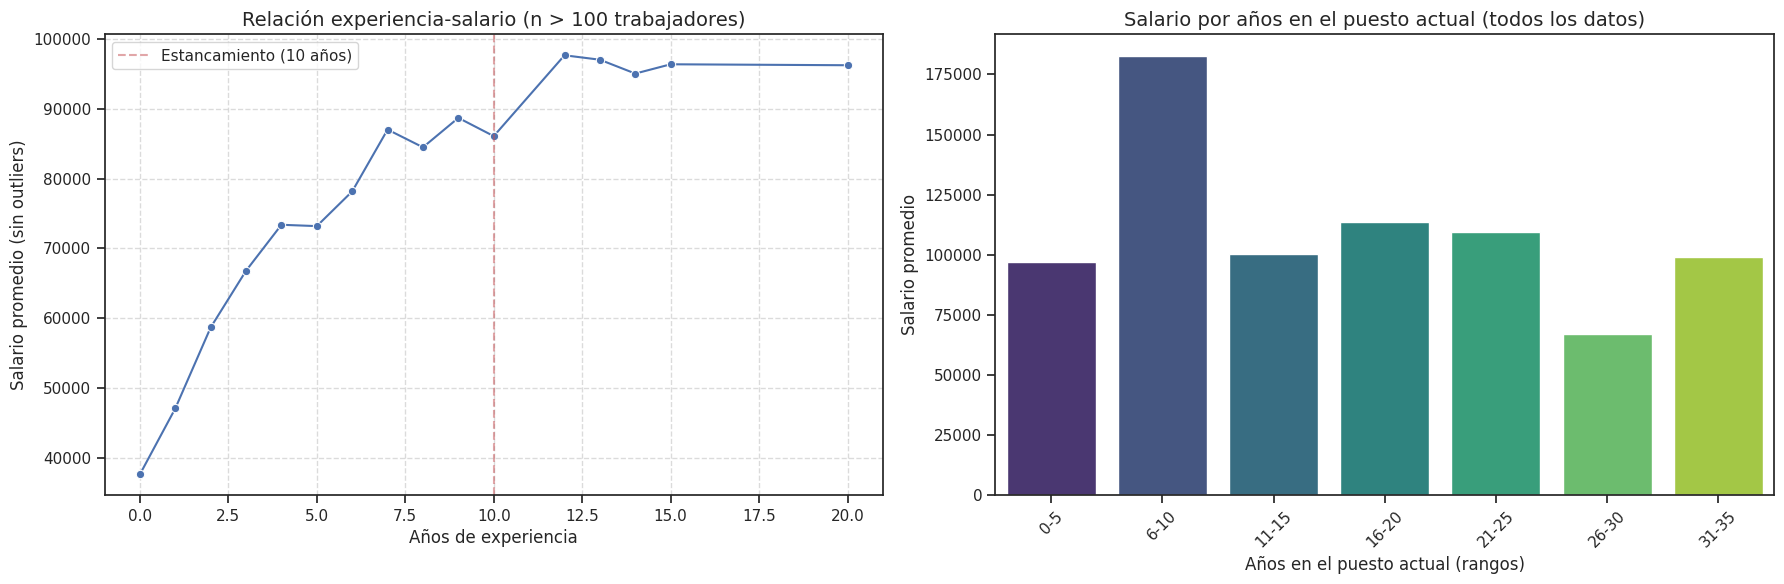

In [15]:
# --- PARTE 1: Gráfico de línea (relación experiencia-salario sin outliers) ---
# Calcular IQR para 'SalarioB'
Q1 = df['SalarioB'].quantile(0.25)
Q3 = df['SalarioB'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers
df_filtered = df[(df['SalarioB'] >= Q1 - 1.5 * IQR) & (df['SalarioB'] <= Q3 + 1.5 * IQR)]

# Agrupar por años de experiencia y filtrar grupos con suficientes datos
grouped_count = df_filtered.groupby('Años de experiencia').size()
valid_experience = grouped_count[grouped_count > 100].index
grouped_salary = df_filtered.groupby('Años de experiencia')['SalarioB'].mean()[valid_experience]

# Crear figura con 2 subplots
plt.figure(figsize=(18, 6))

# Subplot 1: Gráfico de línea
plt.subplot(1, 2, 1)
sns.lineplot(x=grouped_salary.index, y=grouped_salary.values, marker='o', color='b')
plt.axvline(x=10, color='r', linestyle='--', alpha=0.5, label='Estancamiento (10 años)')
plt.xlabel('Años de experiencia', fontsize=12)
plt.ylabel('Salario promedio (sin outliers)', fontsize=12)
plt.title('Relación experiencia-salario (n > 100 trabajadores)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# --- PARTE 2: Gráfico de barras (años en puesto actual vs salario) ---
# Preprocesamiento
bins = [0, 5, 10, 15, 20, 25, 30, 35]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35']
df['Experiencia_binned'] = pd.cut(df['Años en el puesto actual'], bins=bins, labels=labels)

# Agrupar y filtrar
agrupo_count = df.groupby('Experiencia_binned').size()
agrupo_salary = df.groupby('Experiencia_binned')['SalarioB'].mean()

# Subplot 2: Gráfico de barras
plt.subplot(1, 2, 2)
sns.barplot(x=agrupo_salary.index, y=agrupo_salary.values, palette='viridis')
plt.xlabel('Años en el puesto actual (rangos)', fontsize=12)
plt.ylabel('Salario promedio', fontsize=12)
plt.title('Salario por años en el puesto actual (todos los datos)', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()  # Ajustar espaciado entre gráficos
plt.show()

**2.1.5 Hipotesis 5**

*Hipotesis 5: Las personas que mantienen sus puestos de trabajo poseen mayor salarios que los profesionales que recién ingresan a las empresas. Se va a comparar a las personas que tienen menos de 5 años en un mismo puesto*

**Conclusión 5**

*Hipotesis 5: Falso.*

En esta hipótesis se comparó a los profesionales que llevan menos de 5 años en un mismo puesto de trabajo con aquellos que mantienen su posición por más tiempo.

 Los resultados no muestran una correlación significativa entre el tiempo de permanencia en un puesto y el salario.

 Por lo tanto, no podemos afirmar que las personas que mantienen sus puestos de trabajo tengan mayores salarios que los profesionales recién ingresados a las empresas.

## Conclusiones de las hipótesis

En conclusión, nuestro estudio ha permitido confirmar la hipótesis 1, la cual afirma que la cantidad de hombres en el sector IT supera significativamente a la cantidad de mujeres. Esta brecha de género, aunque ha disminuido en los últimos años, sigue siendo un problema importante en la industria.

Por otro lado, la hipótesis 2 resultó ser falsa. En realidad, la mayor cantidad de profesionales del sector se encuentran entre los 25 y 35 años de edad, y no entre los 30 y 40 como se había supuesto originalmente.

Con respecto a la hipótesis 3, se confirmó la existencia de una inequidad salarial de género, ya que los hombres tienen un salario promedio un 20% mayor al de las mujeres. Esta brecha salarial es un problema grave que necesita ser abordado para lograr una mayor igualdad en el sector IT.

En cuanto a la hipótesis 4, los datos no permiten confirmarla de manera clara. Aunque es cierto que los salarios más altos corresponden a los técnicos con más de 10 años de experiencia, no se puede afirmar que los salarios se estancan luego de este punto. Se necesita mayor investigación para determinar si esto es cierto o no.

Finalmente, la hipótesis 5 resultó ser falsa. Los datos no muestran una correlación significativa entre el salario y el tiempo de permanencia en un puesto de trabajo. De hecho, hay casos en los que profesionales que han mantenido su puesto de trabajo por menos de 5 años tienen salarios más altos que aquellos con más tiempo en la misma empresa

# Seleccion de atributos

In [16]:
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

---

### Outliers Remover

In [17]:
# Calcular IQR para 'SalarioB'
Q1 = df['SalarioB'].quantile(0.25)
Q3 = df['SalarioB'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers
df_filtered = df[(df['SalarioB'] >= Q1 - 1.5 * IQR) & (df['SalarioB'] <= Q3 + 1.5 * IQR)]


Correlación de Pearson para los primeros 13 años de experiencia: 0.42


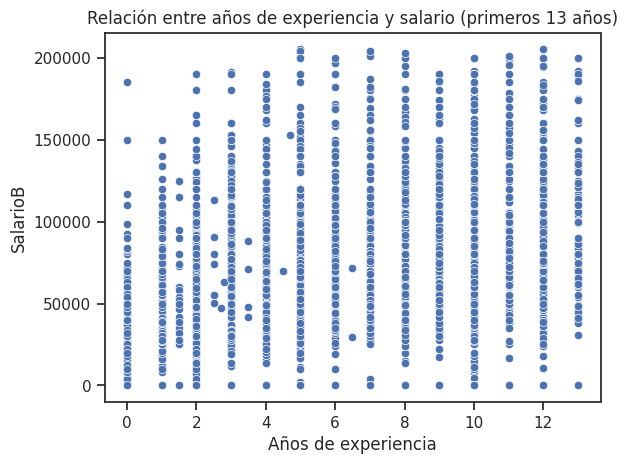

In [18]:
# Seleccionar solo los primeros 13 años de experiencia
df_first_13_years = df_filtered[df_filtered['Años de experiencia'] <= 13]

# Calcular la correlación de Pearson
corr, _ = pearsonr(df_first_13_years['Años de experiencia'], df_first_13_years['SalarioB'])

# Imprimir la correlación
print("Correlación de Pearson para los primeros 13 años de experiencia: {:.2f}".format(corr))

# Gráfico de dispersión para visualizar la relación entre las variables
sns.scatterplot(x='Años de experiencia', y='SalarioB', data=df_first_13_years)
plt.xlabel('Años de experiencia')
plt.ylabel('SalarioB')
plt.title('Relación entre años de experiencia y salario (primeros 13 años)')
plt.show()


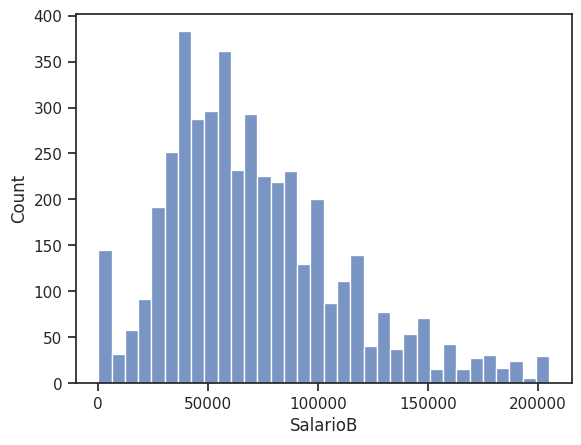

In [19]:
fig=plt.figure()
sns.histplot(data=df_first_13_years, x='SalarioB')
fig.set_facecolor("white")

In [20]:
df_indexed = df_first_13_years.reset_index()

print(df['Años en la empresa actual'].sort_values(ascending=False)[:5])

Timestamp
1/22/2020 20:32:40    2016.0
2/1/2020 20:04:52       88.0
1/16/2020 16:59:10      78.0
2/2/2020 10:32:24       40.0
1/30/2020 23:48:04      36.0
Name: Años en la empresa actual, dtype: float64


---

In [21]:
df_indexed['Años en la empresa actual'].value_counts().sort_index()


,count
Años en la empresa actual,
0.0,1570
0.5,2
1.0,837
1.5,48
1.6,1
1.8,1
1.9,1
2.0,659
2.5,14


In [22]:
df_indexed = df_indexed[df_indexed['Años en la empresa actual'] != 2016]
df_indexed = df_indexed[df_indexed['Años en la empresa actual'] != 88]
df_indexed = df_indexed[df_indexed['Años en el puesto actual'] != 85000]


/tmp/ipython-input-23-1267257558.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, ax=ax, palette='viridis')
/tmp/ipython-input-23-1267257558.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, ax=ax, palette='viridis')
/tmp/ipython-input-23-1267257558.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, ax=ax, palette='viridis')
/tmp/ipython-input-23-1267257558.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

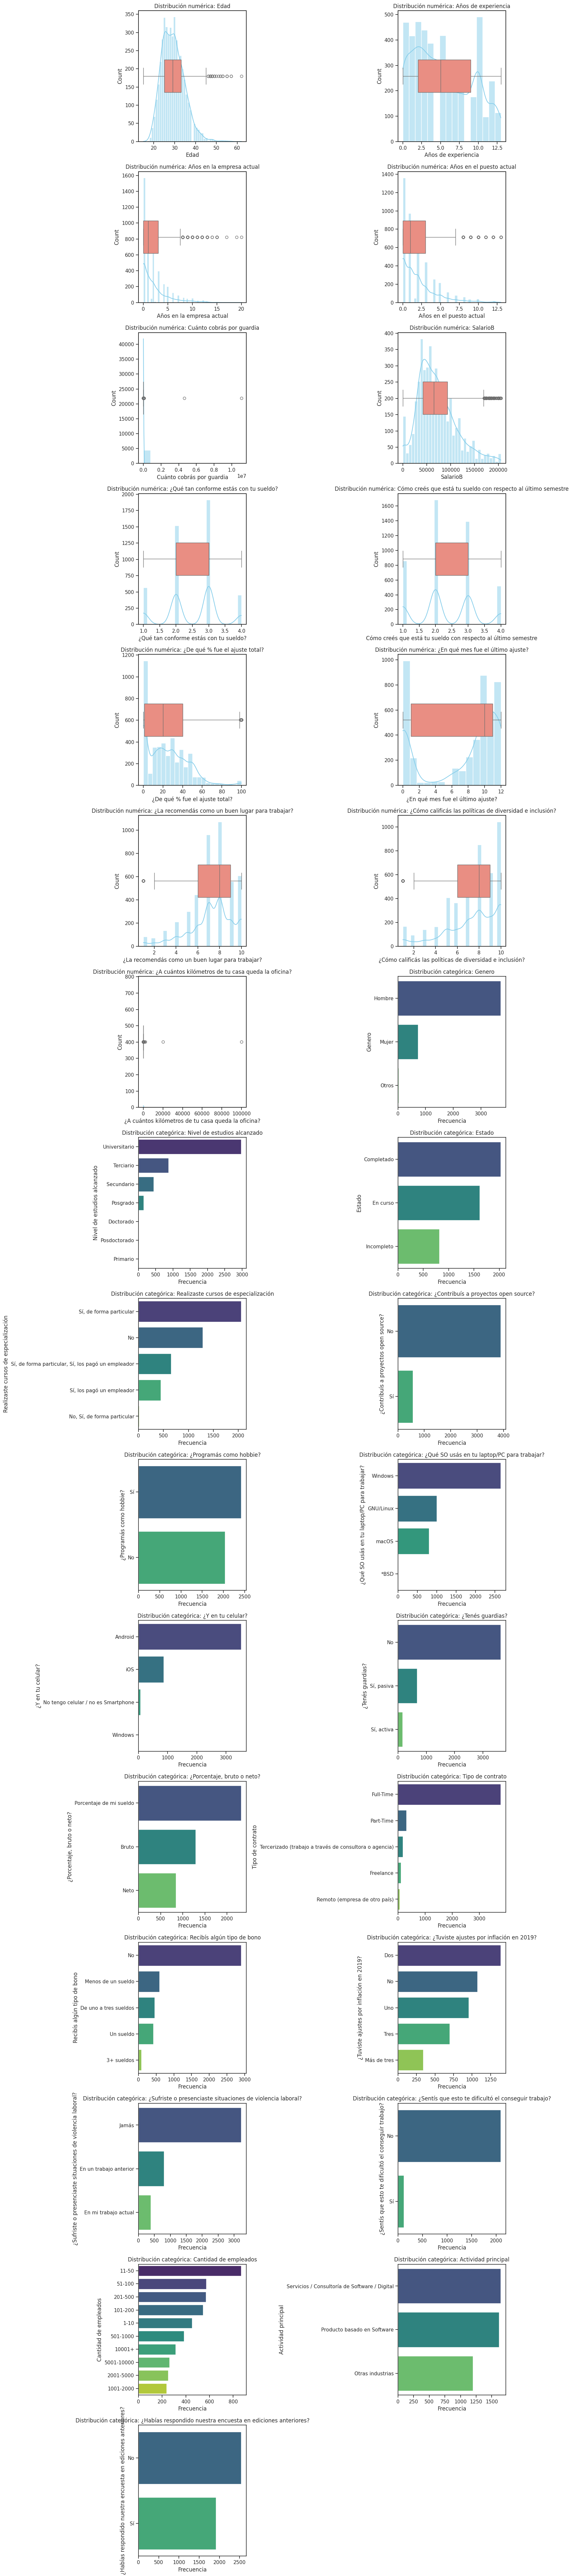

In [23]:
# Separar columnas numéricas y categóricas
numeric_cols = df_indexed.select_dtypes(include='number').columns.tolist()
categorical_cols = df_indexed.select_dtypes(include='object').columns.tolist()

# Limitar cantidad de categorías a mostrar para las columnas categóricas (para evitar plots ilegibles)
max_categories = 10
categorical_cols = [col for col in categorical_cols if df_indexed[col].nunique() <= max_categories]

# Total de subplots
all_cols = numeric_cols + categorical_cols
n_cols = 2
n_rows = int((len(all_cols) + 1) / n_cols)

# Crear figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
axes = axes.flatten()

# Recorrer todas las columnas a graficar
for idx, col in enumerate(all_cols):
    ax = axes[idx]

    if col in numeric_cols:
        # Histograma + KDE
        sns.histplot(df_indexed[col].dropna(), kde=True, ax=ax, color='skyblue')
        ax.set_title(f'Distribución numérica: {col}', fontsize=12)

        # Boxplot encima (eje gemelo)
        ax2 = ax.twinx()
        sns.boxplot(x=df_indexed[col], ax=ax2, color='salmon', width=0.25)
        ax2.set_yticks([])

    elif col in categorical_cols:
        # Frecuencia de categorías
        counts = df_indexed[col].value_counts().head(max_categories)
        sns.barplot(x=counts.values, y=counts.index, ax=ax, palette='viridis')
        ax.set_title(f'Distribución categórica: {col}', fontsize=12)
        ax.set_xlabel('Frecuencia')
        ax.set_ylabel(col)

# Eliminar ejes vacíos si sobran
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Matrix de Correlacion de variables numericas

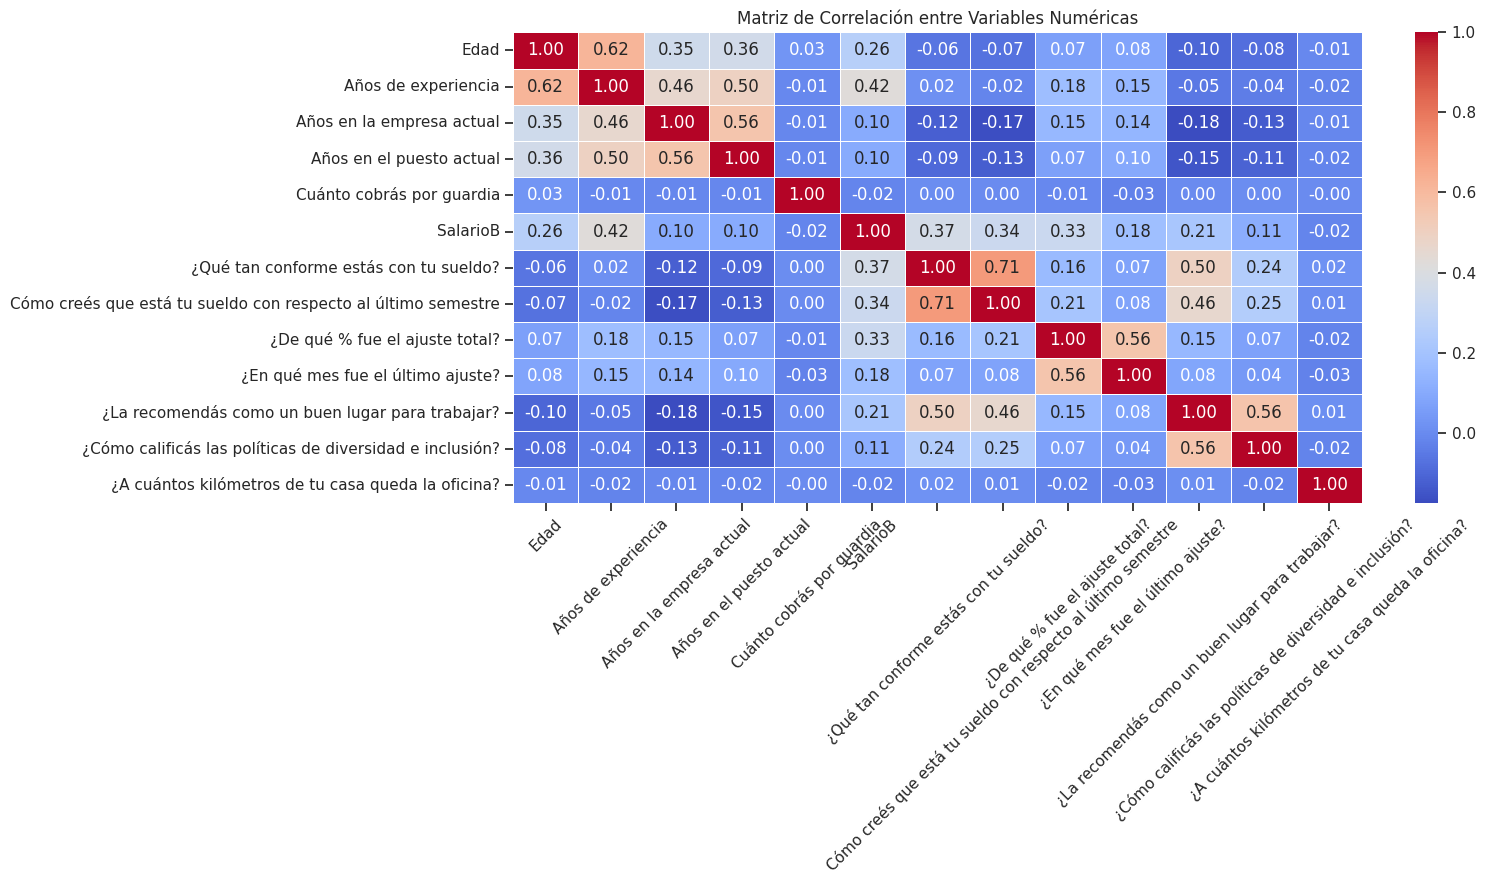

In [24]:
# 1. Seleccionar columnas numéricas (incluyendo SalarioB)
numeric_cols_full = df_indexed.select_dtypes(include='number')

# 2. Calcular matriz de correlación entre todas las variables numéricas
correlation_matrix = numeric_cols_full.corr()

# 3. Crear heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


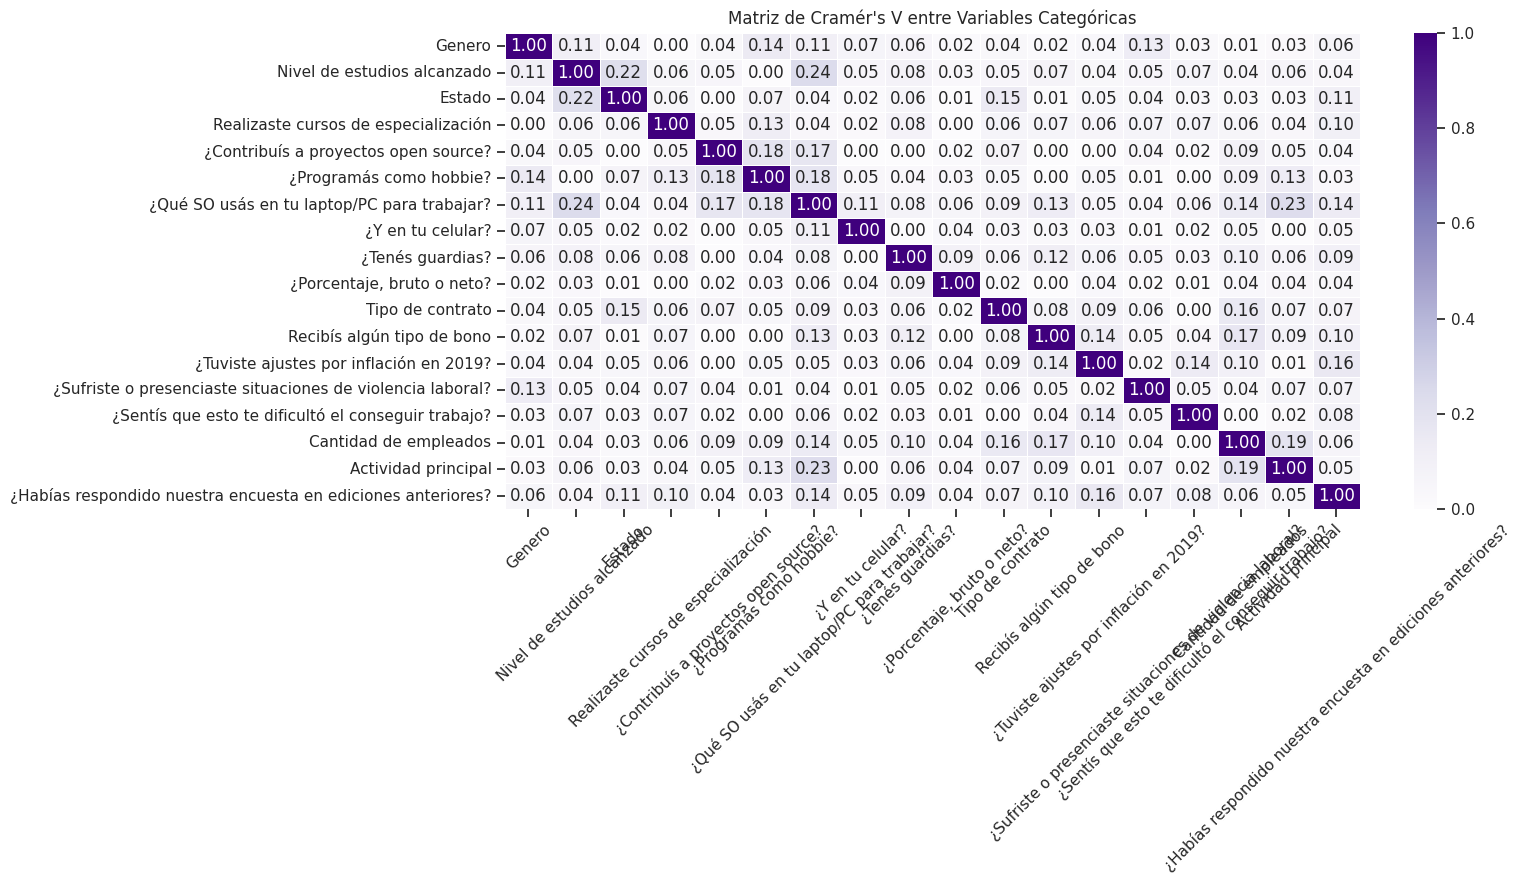

In [25]:
from scipy.stats import chi2_contingency

# Función para calcular Cramér’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
        return np.nan
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Limitar a categóricas con pocos niveles para que sea visualmente legible
max_categories = 10
categorical_cols = [col for col in df_indexed.select_dtypes(include='object').columns if df_indexed[col].nunique() <= max_categories]

# Crear matriz vacía
cramers_results = pd.DataFrame(index=categorical_cols, columns=categorical_cols, dtype=float)

# Calcular Cramér’s V entre todas las combinaciones
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0
        else:
            val = cramers_v(df_indexed[col1], df_indexed[col2])
            cramers_results.loc[col1, col2] = val

# Heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(cramers_results.astype(float), annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Cramér's V entre Variables Categóricas")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



📊 Variables numéricas más correlacionadas con SalarioB:

SalarioB                                                         1.000000
Años de experiencia                                              0.423017
¿Qué tan conforme estás con tu sueldo?                           0.366495
Cómo creés que está tu sueldo con respecto al último semestre    0.335748
¿De qué % fue el ajuste total?                                   0.331522
Edad                                                             0.263807
¿La recomendás como un buen lugar para trabajar?                 0.213566
Name: SalarioB, dtype: float64

🏷️ Variables categóricas con mayor varianza explicada sobre SalarioB:

Timestamp                                                                                             0.997528
Beneficios extra                                                                                      0.662997
Lenguajes de programación                                                                          

/tmp/ipython-input-26-1555621623.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_numeric.values, y=top_n_numeric.index, ax=axes[0], palette='Blues_r')
/tmp/ipython-input-26-1555621623.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_categorical.values, y=top_n_categorical.index, ax=axes[1], palette='Greens_r')


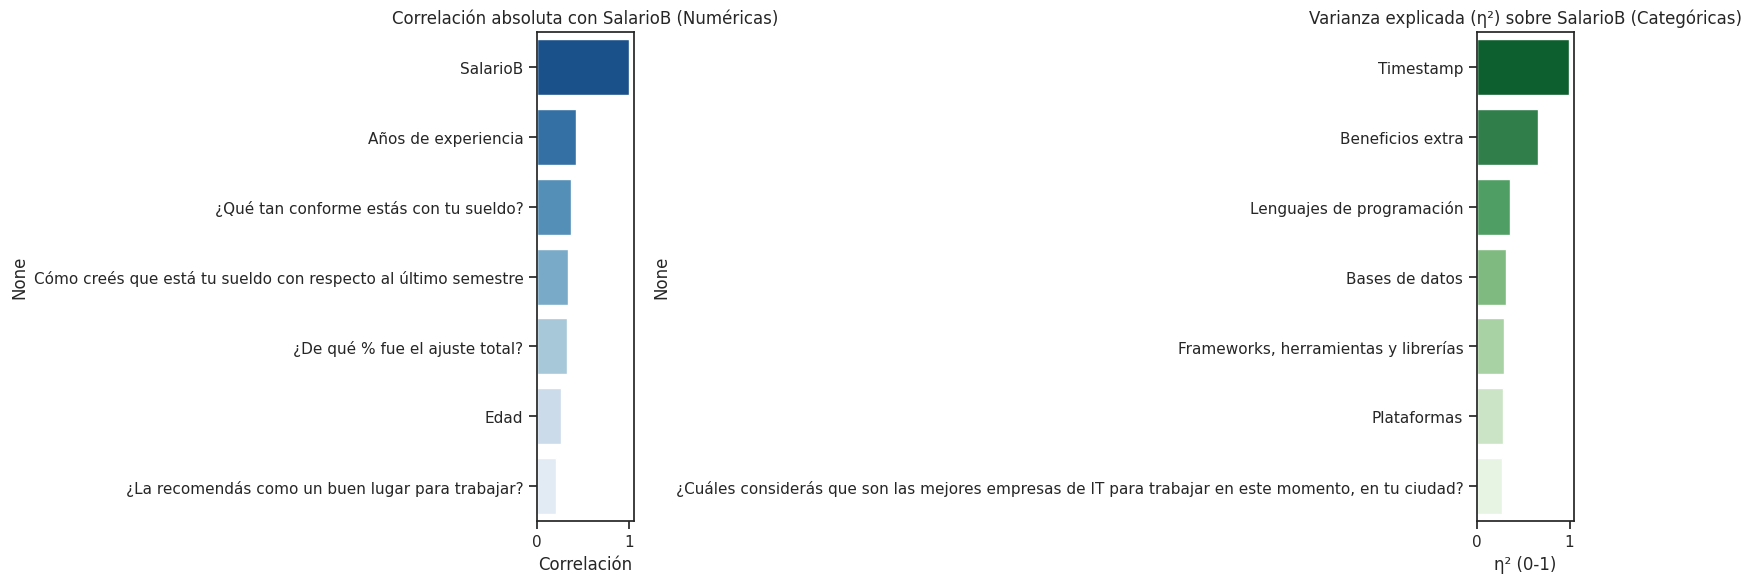

In [26]:
from sklearn.feature_selection import f_classif, f_regression
from scipy.stats import f_oneway


# Separar numéricas y categóricas
numeric_cols = df_indexed.select_dtypes(include='number').columns.tolist()
categorical_cols = df_indexed.select_dtypes(include='object').columns.tolist()

# Remover 'SalarioB' de las numéricas para análisis
numeric_cols = [col for col in numeric_cols if col != 'SalarioB']

# ---------- NUMÉRICAS: Correlación con SalarioB ----------
numeric_corr = df_indexed[numeric_cols + ['SalarioB']].corr()['SalarioB'].abs().sort_values(ascending=False)

# ---------- CATEGÓRICAS: Varianza explicada con ANOVA ----------
def calculate_eta_squared(df_indexed, cat_col, target_col='SalarioB'):
    groups = [df_indexed[df_indexed[cat_col] == level][target_col].dropna() for level in df_indexed[cat_col].dropna().unique()]
    try:
        anova = f_oneway(*groups)
        eta_squared = (anova.statistic * (len(groups) - 1)) / (anova.statistic * (len(groups) - 1) + (df_indexed.shape[0] - len(groups)))
        return eta_squared
    except:
        return np.nan  # Por si alguna categoría tiene pocos datos

categorical_eta = {
    col: calculate_eta_squared(df_indexed, col, 'SalarioB')
    for col in categorical_cols
}

categorical_eta = pd.Series(categorical_eta).dropna().sort_values(ascending=False)

# ---------- MOSTRAR RESULTADOS ----------
top_n_numeric = numeric_corr.head(7)
top_n_categorical = categorical_eta.head(7)

# Mostrar tablas
print("\n📊 Variables numéricas más correlacionadas con SalarioB:\n")
print(top_n_numeric)

print("\n🏷️ Variables categóricas con mayor varianza explicada sobre SalarioB:\n")
print(top_n_categorical)

# ---------- PLOTEAR RESULTADOS ----------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=top_n_numeric.values, y=top_n_numeric.index, ax=axes[0], palette='Blues_r')
axes[0].set_title("Correlación absoluta con SalarioB (Numéricas)")
axes[0].set_xlabel("Correlación")

sns.barplot(x=top_n_categorical.values, y=top_n_categorical.index, ax=axes[1], palette='Greens_r')
axes[1].set_title("Varianza explicada (η²) sobre SalarioB (Categóricas)")
axes[1].set_xlabel("η² (0-1)")

plt.tight_layout()
plt.show()


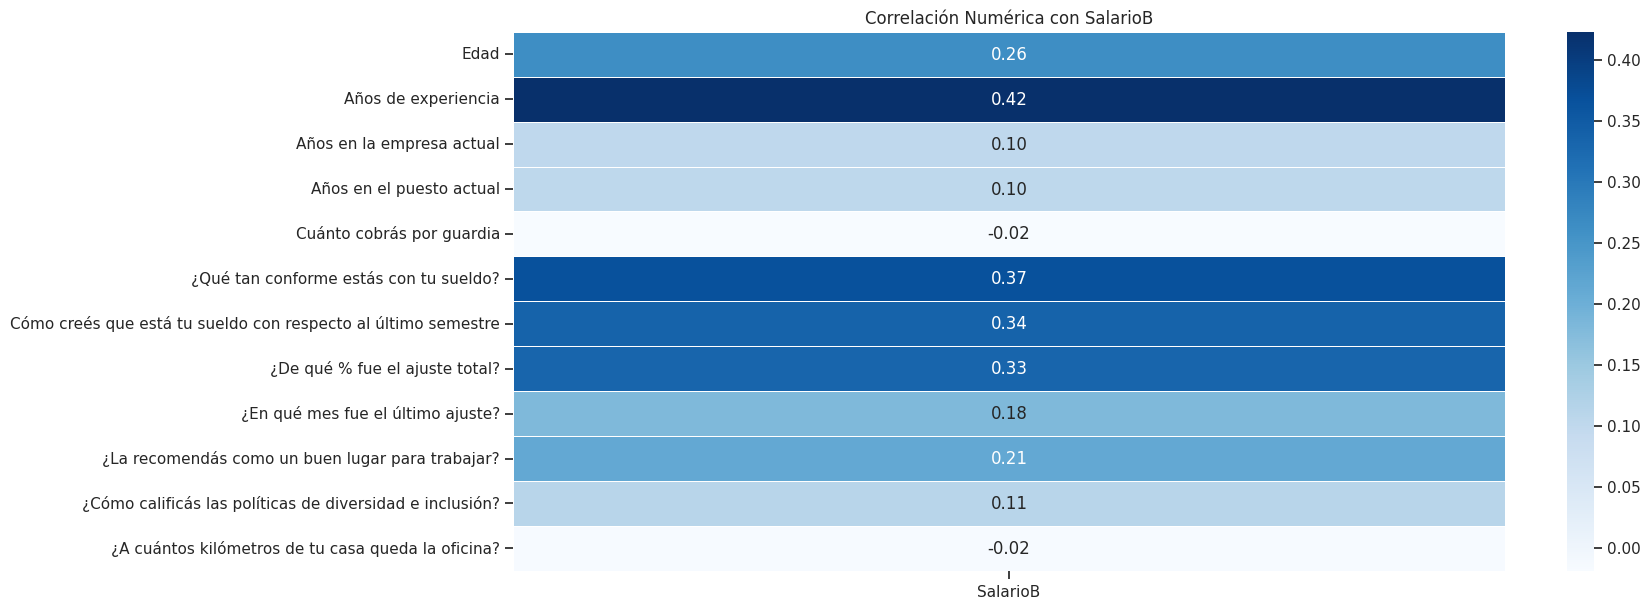

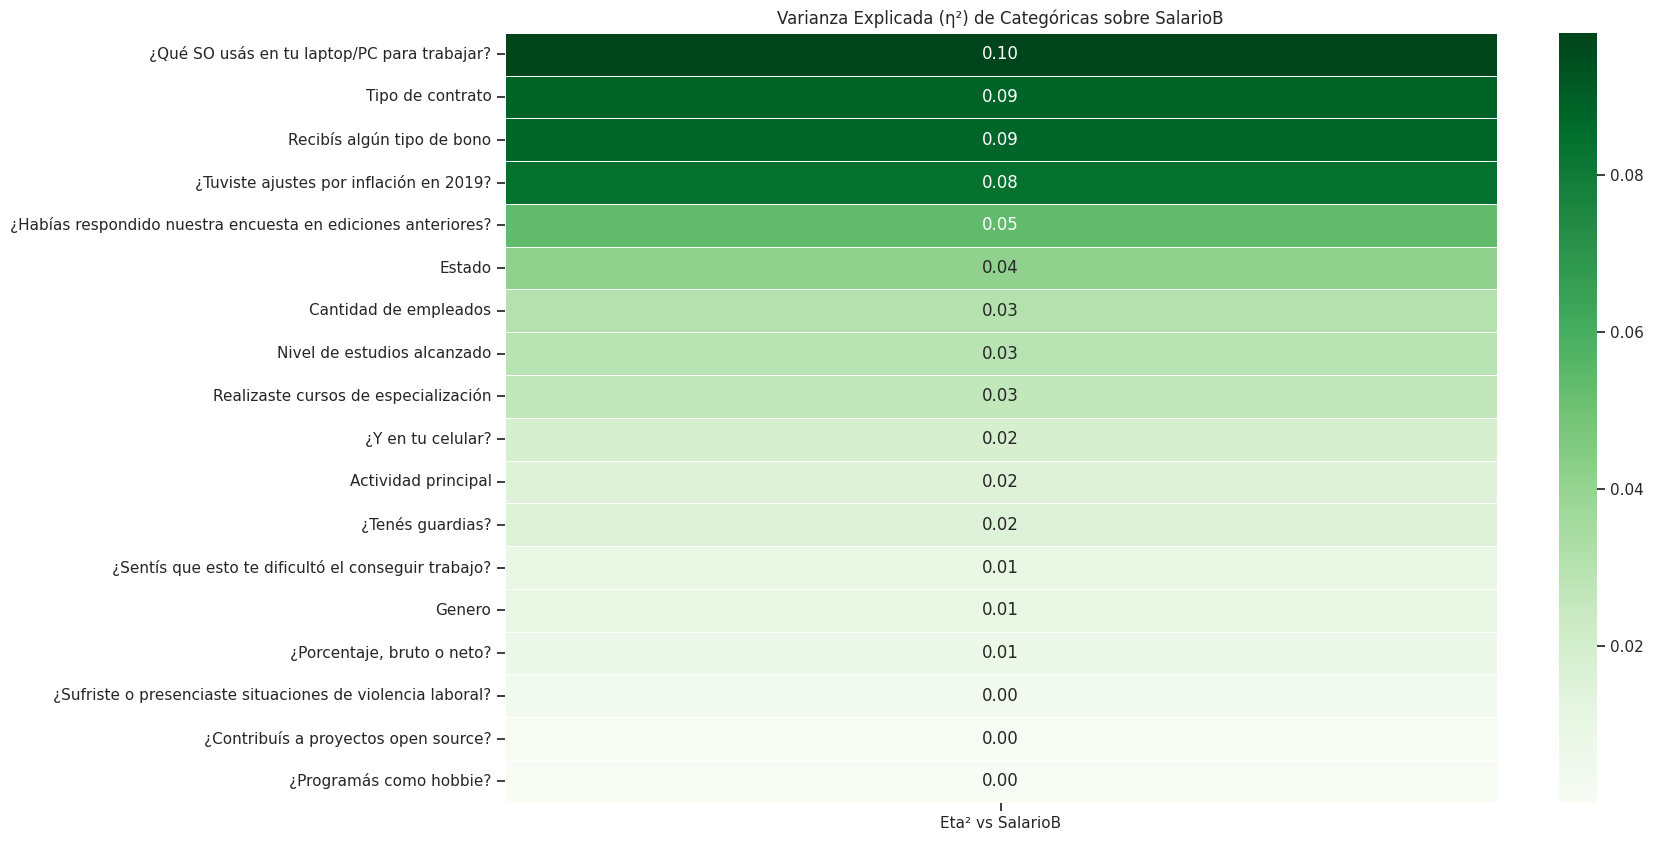

In [27]:
# Supongamos que df_indexed ya está cargado
# Separar columnas numéricas y categóricas
numeric_cols = df_indexed.select_dtypes(include='number').columns.tolist()
categorical_cols = df_indexed.select_dtypes(include='object').columns.tolist()

# Limitar a categorías con pocas clases (opcional)
max_categories = 10
categorical_cols = [col for col in categorical_cols if df_indexed[col].nunique() <= max_categories]

# ------------------ NUMÉRICAS: matriz de correlación ------------------

# Calcular matriz de correlación solo numérica
numeric_corr = df_indexed[numeric_cols].corr()

# Filtrar sólo las correlaciones con 'SalarioB'
if 'SalarioB' not in numeric_corr.columns:
    raise ValueError("No se encuentra 'SalarioB' en las columnas numéricas.")

numeric_corr_target = numeric_corr[['SalarioB']].drop('SalarioB')  # eliminar autocorrelación

# ------------------ CATEGÓRICAS: eta squared ------------------

def calculate_eta_squared(df, cat_col, target_col='SalarioB'):
    groups = [df[df[cat_col] == val][target_col].dropna() for val in df[cat_col].dropna().unique()]
    try:
        anova = f_oneway(*groups)
        eta_sq = (anova.statistic * (len(groups) - 1)) / (
            anova.statistic * (len(groups) - 1) + (df.shape[0] - len(groups))
        )
        return eta_sq
    except:
        return np.nan

# Calcular η² para cada variable categórica respecto a SalarioB
eta_results = {
    col: calculate_eta_squared(df_indexed, col, 'SalarioB')
    for col in categorical_cols
}

eta_series = pd.Series(eta_results).dropna().sort_values(ascending=False)

# ------------------ HEATMAP NUMÉRICAS ------------------
plt.figure(figsize=(16, len(numeric_corr_target) * 0.5 + 1))
sns.heatmap(numeric_corr_target, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlación Numérica con SalarioB")
plt.show()

# ------------------ HEATMAP CATEGÓRICAS ------------------
plt.figure(figsize=(16, len(eta_series) * 0.5 + 1))
sns.heatmap(eta_series.to_frame(name='Eta² vs SalarioB'), annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Varianza Explicada (η²) de Categóricas sobre SalarioB")
plt.show()


In [28]:
from scipy.stats import chi2_contingency, f_oneway
import pandas as pd
import numpy as np

# NUMERICAS
def get_low_correlation_numeric_features(df, target_col='SalarioB', threshold=0.05):
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    numeric_cols = [col for col in numeric_cols if col != target_col]

    correlations = df[numeric_cols + [target_col]].corr()[target_col].abs()
    low_corr = correlations[correlations < threshold].index.tolist()
    return low_corr

# CATEGORICAS

# Cramér’s V helper
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
        return np.nan
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# η² helper
def calculate_eta_squared(df, cat_col, target_col='SalarioB'):
    groups = [df[df[cat_col] == val][target_col].dropna() for val in df[cat_col].dropna().unique()]
    try:
        anova = f_oneway(*groups)
        eta_sq = (anova.statistic * (len(groups) - 1)) / (
            anova.statistic * (len(groups) - 1) + (df.shape[0] - len(groups))
        )
        return eta_sq
    except:
        return np.nan

# Función principal
def get_low_cramersv_categorical_features(df, min_cramers=0.1, max_eta2=0.01, target_col='SalarioB'):
    cat_cols = df.select_dtypes(include='object').columns.tolist()

    # Filtrar columnas con pocas categorías
    cat_cols = [col for col in cat_cols if df[col].nunique() <= 10]

    # Cramér's V max with others
    low_cramers = []
    for col in cat_cols:
        others = [c for c in cat_cols if c != col]
        max_v = max([cramers_v(df[col], df[c2]) for c2 in others], default=0)
        if max_v < min_cramers:
            low_cramers.append(col)

    # Eta² (respecto al target)
    low_eta2 = {
        col: calculate_eta_squared(df, col, target_col)
        for col in cat_cols
    }
    low_eta2 = [col for col, eta in low_eta2.items() if eta is not None and eta < max_eta2]

    # Intersección
    to_drop = list(set(low_cramers) & set(low_eta2))
    return to_drop


## Tener en cuenta la cantidad de datos nulls

In [29]:
def eliminar_columnas_faltantes(df, umbral=0.5):
    # Calcular el porcentaje de datos faltantes por columna
    porcentaje_faltantes = df.isnull().mean()


    # Obtener las columnas que superan el umbral de datos faltantes
    columnas_eliminar = porcentaje_faltantes[porcentaje_faltantes > umbral].index

    print(columnas_eliminar)

    # Eliminar las columnas del DataFrame
    df_filtrado = df.drop(columnas_eliminar, axis=1)

    return df_filtrado

In [30]:
df_filtrado = eliminar_columnas_faltantes(df_indexed)

Index(['QA / Testing', '¿Tenés algún tipo de discapacidad?',
       '¿Sentís que esto te dificultó el conseguir trabajo?',
       '¿A qué eventos de tecnología asististe en el último año?',
       '¿Sos miembro de alguna comunidad IT?',
       '¿Cuáles considerás que son las mejores empresas de IT para trabajar en este momento, en tu ciudad?'],
      dtype='object')


In [31]:
# Eliminicacion por incompletitud de data
df_filtrado

,Timestamp,Genero,Edad,Años de experiencia,Años en la empresa actual,Años en el puesto actual,¿Gente a cargo?,Nivel de estudios alcanzado,Estado,Carrera,...,Orientación sexual,Cantidad de empleados,Actividad principal,¿La recomendás como un buen lugar para trabajar?,¿Cómo calificás las políticas de diversidad e inclusión?,¿A cuántos kilómetros de tu casa queda la oficina?,Beneficios extra,¿Habías respondido nuestra encuesta en ediciones anteriores?,SalarioB_cat,Experiencia_binned
0,1/31/2020 6:50:26,Hombre,32,10.0,3.0,1.0,0,Secundario,Completado,0,...,Homosexual,10001+,Producto basado en Software,8,10,6.0,"Capacitaciones y/o cursos, Comidas pagas / sub...",No,Salario Muy bajo,0-5
1,1/28/2020 9:27:48,Hombre,30,3.0,3.0,3.0,0,Terciario,Completado,Diseño Gráfico,...,Heterosexual,51-100,Otras industrias,7,3,35.0,Capacitaciones y/o cursos,No,Salario bajo,0-5
2,2/1/2020 5:46:25,Mujer,36,10.0,3.0,3.0,0,Universitario,Completado,Abogada,...,Heterosexual,51-100,Otras industrias,7,5,4.0,Viáticos,No,Salario medio,0-5
3,2/1/2020 17:51:21,Hombre,29,10.0,2.0,2.0,0,Universitario,Completado,Licenciatura en Comercialización y Marketing,...,Heterosexual,11-50,Otras industrias,5,8,7.0,Ninguna de las anteriores,No,Salario Muy bajo,0-5
4,2/1/2020 23:13:41,Hombre,27,4.0,3.0,2.0,0,Universitario,En curso,Arquitectura,...,Heterosexual,1-10,Otras industrias,2,6,12.0,"Capacitaciones y/o cursos, Descuentos varios (...",No,Salario Muy bajo,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,1/28/2020 12:03:32,Hombre,45,12.0,2.0,2.0,15,Universitario,Incompleto,Tecnicatura Superior en Sistemas Informáticos,...,Heterosexual,5001-10000,Otras industrias,8,8,22.0,"Abono de celular y/o Internet, Capacitaciones ...",No,Salario muy alto,0-5
4455,1/28/2020 12:09:35,Hombre,33,11.0,6.0,3.0,3,Universitario,Completado,Licenciatura en Sistemas de Información,...,NaN,1-10,Producto basado en Software,10,10,-1.0,"Horarios flexibles, Stock options / RSUs, WFH ...",Sí,Salario muy alto,0-5
4456,1/29/2020 14:06:24,Hombre,35,12.0,5.0,2.0,20,Universitario,Completado,Ingeniería en Sistemas de Información,...,Bisexual o queer,51-100,Otras industrias,10,10,0.0,"Abono de celular y/o Internet, Capacitaciones ...",Sí,Salario muy alto,0-5
4457,1/30/2020 4:48:47,Hombre,33,9.0,9.0,9.0,0,Universitario,En curso,NaN,...,NaN,201-500,Servicios / Consultoría de Software / Digital,7,7,1.0,Comidas pagas / subvencionadas,No,Salario Muy bajo,6-10


In [32]:
numeric_to_drop = get_low_correlation_numeric_features(df_filtrado, target_col='SalarioB', threshold=0.05)
categorical_to_drop = get_low_cramersv_categorical_features(df_filtrado)

print("🔻 Columnas numéricas a eliminar:", numeric_to_drop)
print("🔻 Columnas categóricas a eliminar:", categorical_to_drop)

# Supongamos que ya tenés estas listas de columnas a eliminar
columns_to_drop = numeric_to_drop + categorical_to_drop

# Eliminar columnas del DataFrame original
df_filtrado = df_filtrado.drop(columns=columns_to_drop)


🔻 Columnas numéricas a eliminar: ['Cuánto cobrás por guardia', '¿A cuántos kilómetros de tu casa queda la oficina?']
🔻 Columnas categóricas a eliminar: ['¿Porcentaje, bruto o neto?']


In [33]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4456 entries, 0 to 4458
Data columns (total 42 columns):
 #   Column                                                         Non-Null Count  Dtype   
---  ------                                                         --------------  -----   
 0   Timestamp                                                      4456 non-null   object  
 1   Genero                                                         4456 non-null   object  
 2   Edad                                                           4456 non-null   int64   
 3   Años de experiencia                                            4456 non-null   float64 
 4   Años en la empresa actual                                      4456 non-null   float64 
 5   Años en el puesto actual                                       4456 non-null   float64 
 6   ¿Gente a cargo?                                                4456 non-null   object  
 7   Nivel de estudios alcanzado                             

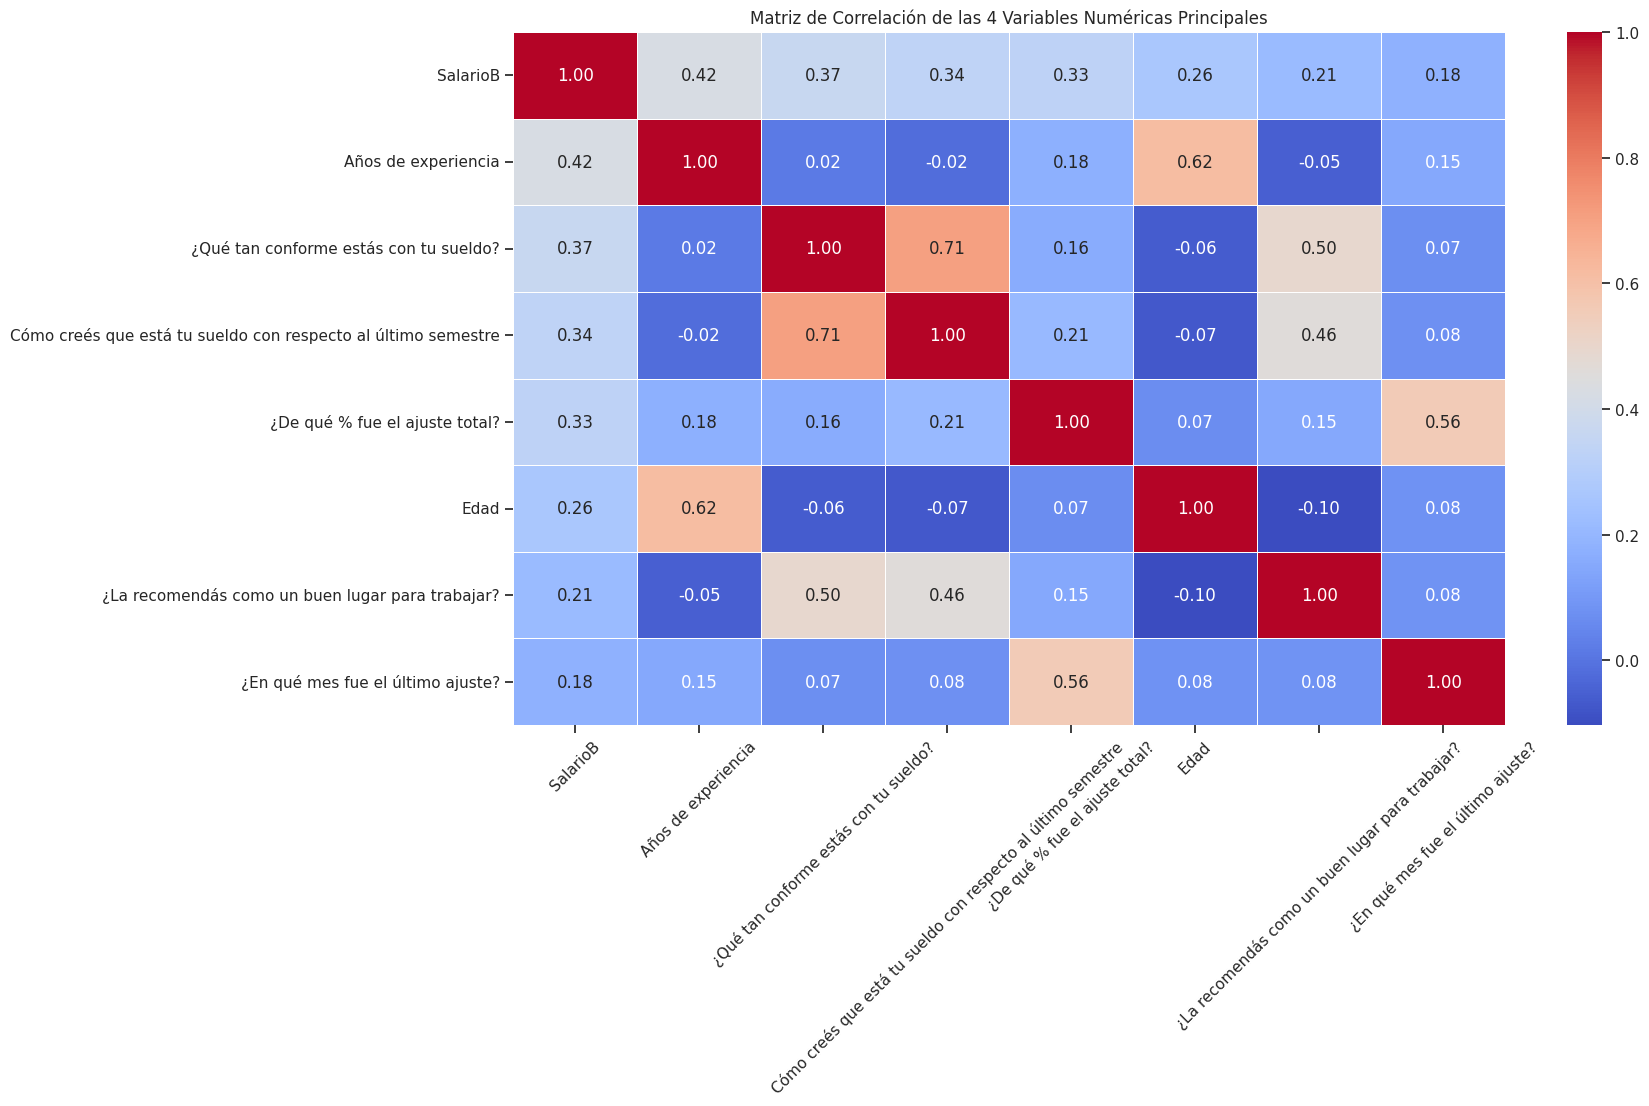

In [34]:
# Seleccionar columnas numéricas (incluyendo SalarioB)
numeric_df = df_filtrado.select_dtypes(include='number')

# Calcular matriz de correlación
correlation_matrix = numeric_df.corr()

# Buscar 7
top_n_variables = correlation_matrix['SalarioB'].abs().nlargest(8).index

# Filtrar matriz de correlación sólo para esas variables
top_correlation_matrix = correlation_matrix.loc[top_n_variables, top_n_variables]

# Generar el heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de las 4 Variables Numéricas Principales')
plt.xticks(rotation=45)
plt.show()


In [35]:
def drop_low_and_collinear_features(df, target_col='SalarioB', corr_threshold=0.25, colineal_threshold=0.7):

    df_num = df.select_dtypes(include='number').copy()

    if target_col not in df_num.columns:
        raise ValueError(f"La columna objetivo '{target_col}' no está en el DataFrame numérico.")

    # Paso 1: Correlación con target
    corr_target = df_num.corr()[target_col].drop(target_col)
    low_corr_cols = corr_target[abs(corr_target) < corr_threshold].index.tolist()

    # Paso 2: Multicolinealidad entre features
    corr_matrix = df_num.drop(columns=target_col).corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    colinear_cols = [
        column for column in upper_triangle.columns
        if any(upper_triangle[column] > colineal_threshold)
    ]

    # Paso 3: Unión de columnas a eliminar
    cols_to_drop = list(set(low_corr_cols + colinear_cols))

    # Eliminamos del DataFrame original (no solo las numéricas)
    df_filtrado = df.drop(columns=cols_to_drop, errors='ignore')

    return df_filtrado, cols_to_drop

In [36]:
df_filtrado_umbral, _ =drop_low_and_collinear_features(df_filtrado)

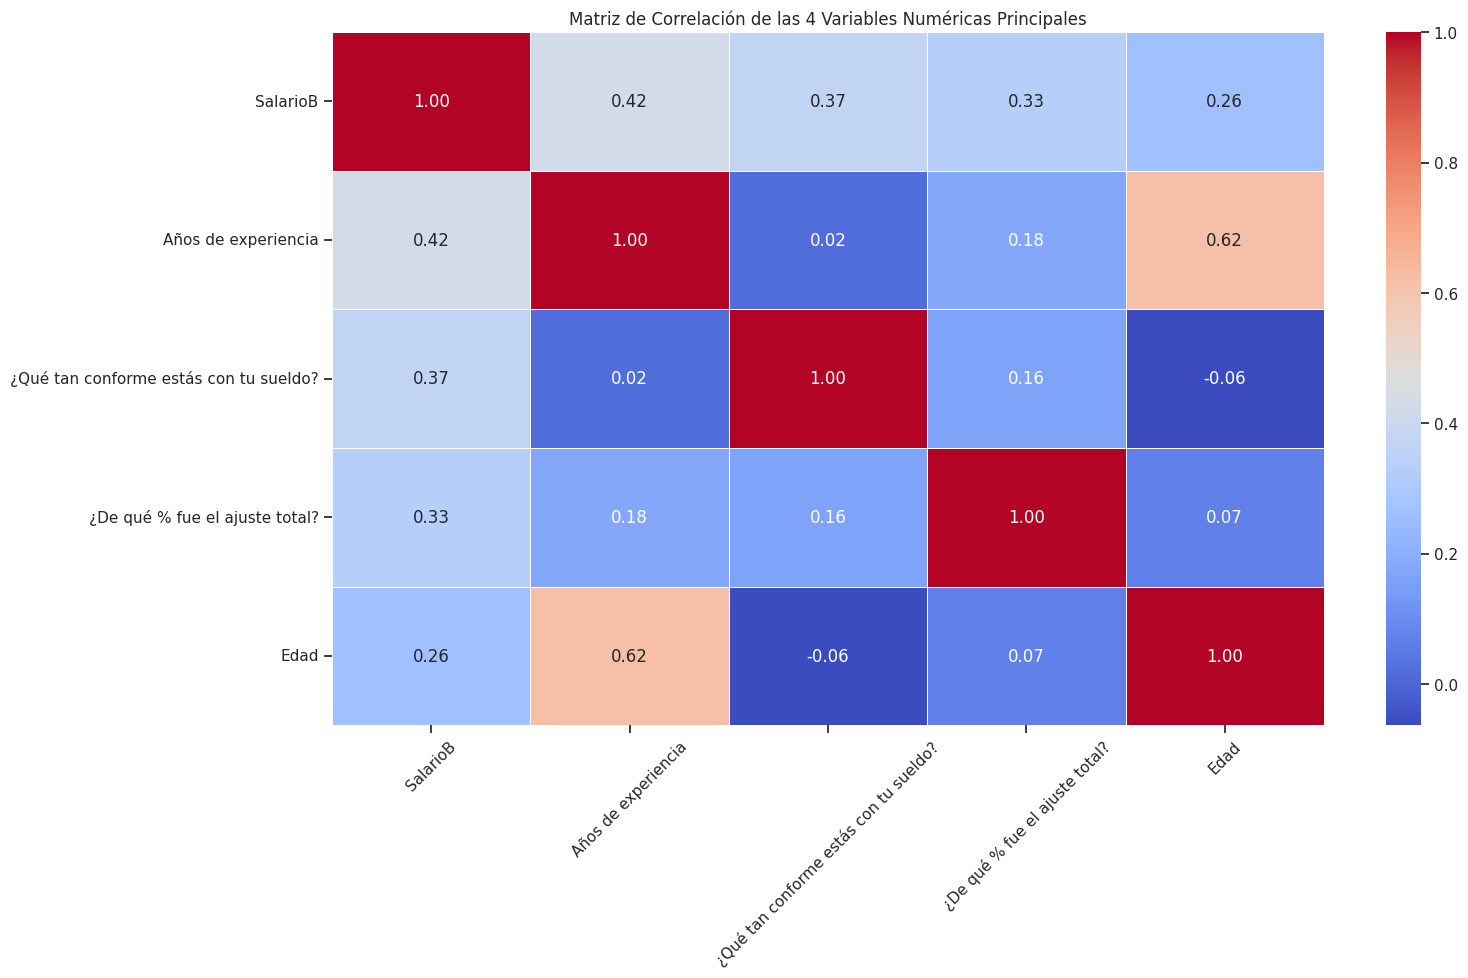

In [37]:
# Seleccionar columnas numéricas (incluyendo SalarioB)
numeric_df = df_filtrado_umbral.select_dtypes(include='number')

# Calcular matriz de correlación
correlation_matrix = numeric_df.corr()

# Buscar 7
top_n_variables = correlation_matrix['SalarioB'].abs().nlargest(8).index

# Filtrar matriz de correlación sólo para esas variables
top_correlation_matrix = correlation_matrix.loc[top_n_variables, top_n_variables]

# Generar el heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de las 4 Variables Numéricas Principales')
plt.xticks(rotation=45)
plt.show()

In [38]:
df_filtrado_umbral.drop(columns=["Genero"],inplace=True)

In [39]:
df_filtrado_umbral.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4456 entries, 0 to 4458
Data columns (total 35 columns):
 #   Column                                                        Non-Null Count  Dtype   
---  ------                                                        --------------  -----   
 0   Timestamp                                                     4456 non-null   object  
 1   Edad                                                          4456 non-null   int64   
 2   Años de experiencia                                           4456 non-null   float64 
 3   ¿Gente a cargo?                                               4456 non-null   object  
 4   Nivel de estudios alcanzado                                   4456 non-null   object  
 5   Estado                                                        4456 non-null   object  
 6   Carrera                                                       4191 non-null   object  
 7   Universidad                                                   397

## Etapa de train

In [40]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [41]:
df_filtrado_umbral[top_n_variables]

,SalarioB,Años de experiencia,¿Qué tan conforme estás con tu sueldo?,¿De qué % fue el ajuste total?,Edad
0,45.0,10.0,2,10.0,32
1,48000.0,3.0,1,10.0,30
2,75000.0,10.0,3,0.0,36
3,40000.0,10.0,1,24.0,29
4,37518.0,4.0,2,20.0,27
...,...,...,...,...,...
4454,200000.0,12.0,3,30.0,45
4455,170000.0,11.0,3,15.0,33
4456,195000.0,12.0,4,23.0,35
4457,1.0,9.0,4,0.0,33


In [42]:
target = "SalarioB"

In [43]:
X = df_filtrado_umbral[top_n_variables].drop(columns=[target])

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4456 entries, 0 to 4458
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Años de experiencia                     4456 non-null   float64
 1   ¿Qué tan conforme estás con tu sueldo?  4456 non-null   int64  
 2   ¿De qué % fue el ajuste total?          4456 non-null   float64
 3   Edad                                    4456 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 174.1 KB


In [45]:
# Aplicar LabelEncoder a las variables categóricas en 'X'
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

## Caso donde quiero una regresion lineal simple

In [46]:
y = df_filtrado_umbral['SalarioB']

In [47]:
from sklearn.model_selection import train_test_split

# Primera división: 70% train, 30% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Segunda división: 15% val y 15% test (50% de X_temp)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print(f"Train: {X_train.shape[0]} muestras")
print(f"Val: {X_val.shape[0]} muestras")
print(f"Test: {X_test.shape[0]} muestras")

Train: 3119 muestras
Val: 668 muestras
Test: 669 muestras


In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [49]:
param_grid = {
    'fit_intercept': [True, False],
    'n_jobs': [-1, None, 1, 2]  # Opciones de paralelización
}

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
grid_search = GridSearchCV(
    LinearRegression(),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # Métrica para regresión
    verbose=1  # Muestra progreso
)

grid_search.fit(X_train_scaled, y_train)

# Mejor modelo
best_reg = grid_search.best_estimator_

# Evaluación en validación
y_val_pred = best_reg.predict(X_val_scaled)
print("\nMétricas en Validación:")
print(f"MAE: {mean_absolute_error(y_val, y_val_pred):.4f}")
print(f"MSE: {mean_squared_error(y_val, y_val_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred)):.4f}")
print(f"R²: {r2_score(y_val, y_val_pred):.4f}")

# Evaluación en test
y_test_pred = best_reg.predict(X_test_scaled)
print("\nMétricas en Test:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"R²: {r2_score(y_test, y_test_pred):.4f}")

# Mostrar mejores parámetros
print("\nMejores parámetros encontrados:")
print(grid_search.best_params_)

# pcional: Mostrar coeficientes del modelo
print("\nCoeficientes del modelo:")
for feature, coef in zip(X.columns, best_reg.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercepto: {best_reg.intercept_:.4f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Métricas en Validación:
MAE: 24717.3060
MSE: 1125210829.2739
RMSE: 33544.1624
R²: 0.3267

Métricas en Test:
MAE: 24176.2001
MSE: 1035574106.4946
RMSE: 32180.3373
R²: 0.3022

Mejores parámetros encontrados:
{'fit_intercept': True, 'n_jobs': -1}

Coeficientes del modelo:
Años de experiencia: 14260.0066
¿Qué tan conforme estás con tu sueldo?: 13444.1794
¿De qué % fue el ajuste total?: 9174.7015
Edad: 2559.5090
Intercepto: 71215.2937


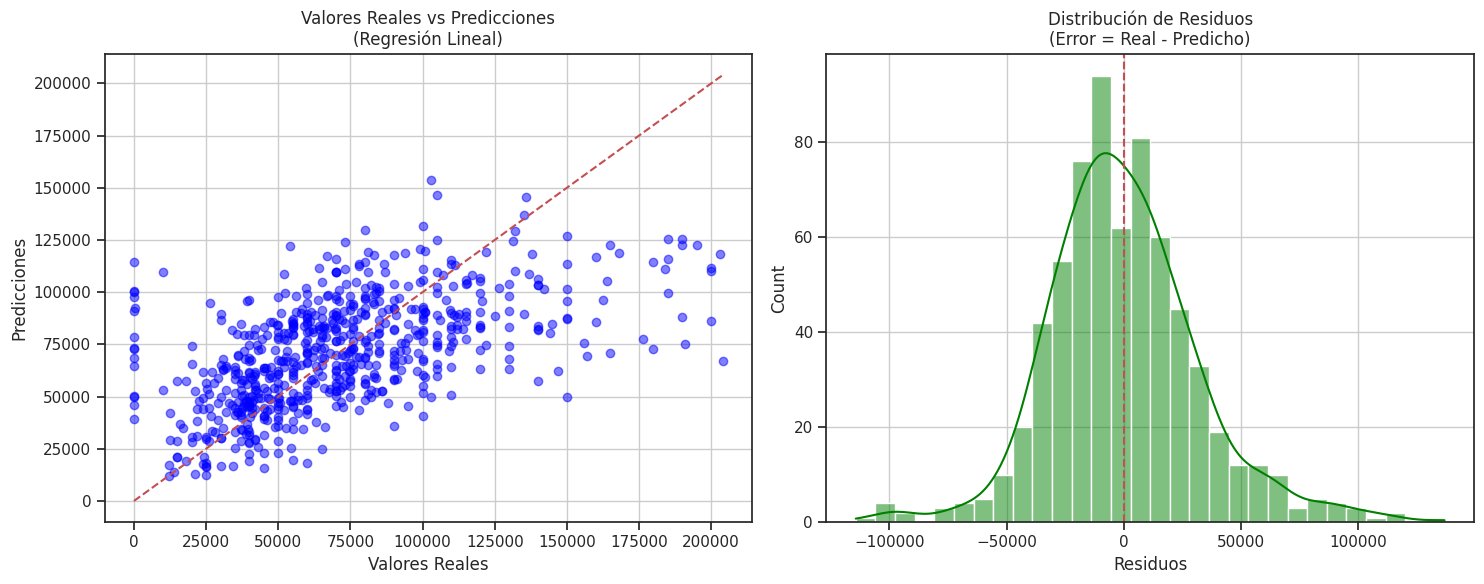

In [52]:
plt.figure(figsize=(15, 6))  # Figura más ancha para dos subplots

# Subplot 1: Valores reales vs predichos
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones\n(Regresión Lineal)')
plt.grid(True)

# Subplot 2: Distribución de residuos
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
residuos = y_test - y_test_pred
sns.histplot(residuos, kde=True, bins=30, color='green')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residuos')
plt.title('Distribución de Residuos\n(Error = Real - Predicho)')
plt.grid(True)

# Ajustar espaciado y mostrar
plt.tight_layout()  # Evita superposición
plt.show()

In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score


Comparación de Modelos (R² Score):
Ridge (L2): 0.3612 (+/- 0.0339)
Lasso (L1): 0.3612 (+/- 0.0339)
Random Forest: 0.2738 (+/- 0.0240)
Gradient Boosting: 0.3820 (+/- 0.0312)
SVR: 0.1847 (+/- 0.0190)


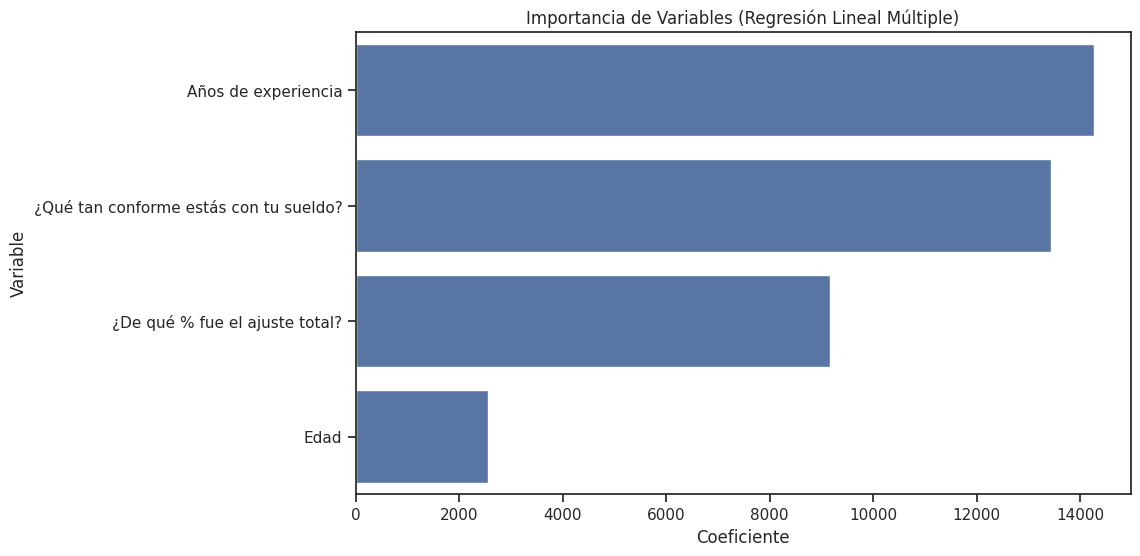

In [54]:
modelos = {
    'Ridge (L2)': Ridge(alpha=1.0),
    'Lasso (L1)': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100),
    'SVR': SVR(kernel='rbf', C=100)
}

# Evaluación rápida con cross-validation
print("\nComparación de Modelos (R² Score):")
for nombre, modelo in modelos.items():
    scores = cross_val_csore(modelo, X_train_scaled, y_train, cv=5, scoring='r2')
    print(f"{nombre}: {scores.mean():.4f} (+/- {scores.std():.4f})")

# =============================================
# 3. Ejemplo con Regresión Lineal Múltiple
# =============================================

# Gráfico de coeficientes (importancia de variables)
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': best_reg.coef_
}).sort_values('Coeficiente', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df)
plt.title('Importancia de Variables (Regresión Lineal Múltiple)')
plt.show()



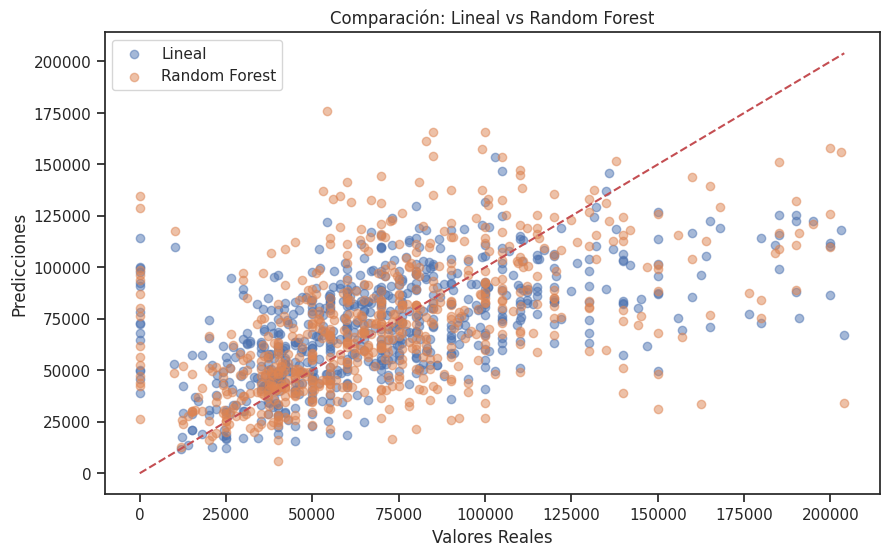

In [55]:
# 4. Sugerencia de Modelo No Lineal (Ejemplo con RandomForest)

# Entrenar y evaluar RandomForest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_test_rf = rf.predict(X_test_scaled)

# Gráfico comparativo
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Lineal')
plt.scatter(y_test, y_test_rf, alpha=0.5, label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación: Lineal vs Random Forest')
plt.legend()
plt.show()

## Si quisiera que sea un multiclase

In [56]:
y = pd.cut(df_filtrado_umbral['SalarioB'], bins=[0, 60000, 120000, np.inf], labels=['Bajo', 'Medio', 'Alto'])
y.info()

<class 'pandas.core.series.Series'>
Index: 4456 entries, 0 to 4458
Series name: SalarioB
Non-Null Count  Dtype   
--------------  -----   
4456 non-null   category
dtypes: category(1)
memory usage: 39.3 KB


In [57]:
from sklearn.model_selection import train_test_split

# Primera división: 70% train, 30% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Segunda división: 15% val y 15% test (50% de X_temp)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print(f"Train: {X_train.shape[0]} muestras")
print(f"Val: {X_val.shape[0]} muestras")
print(f"Test: {X_test.shape[0]} muestras")

Train: 3119 muestras
Val: 668 muestras
Test: 669 muestras


In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Definir los hiperparámetros a probar en el GridSearch
param_grid = {'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l2']}

In [60]:
# GridSearchCV con los datos de entrenamiento
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5  # Usa validación cruzada interna en train
)
grid_search.fit(X_train_scaled, y_train)

# Mejor modelo encontrado
best_clf = grid_search.best_estimator_

# Evaluar en el conjunto de validación (opcional)
y_val_pred = best_clf.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Exactitud en validación: {val_accuracy:.4f}")

# Evaluación final en test (¡solo una vez!)
y_test_pred = best_clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Exactitud en test: {test_accuracy:.4f}")

# Métricas adicionales (opcional)
print("\nMétricas en test:")
print("Precisión:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1:", f1_score(y_test, y_test_pred, average='weighted'))

Exactitud en validación: 0.6272
Exactitud en test: 0.6293

Métricas en test:
Precisión: 0.6178132364231019
Recall: 0.6292974588938715
F1: 0.6179317293652796


In [61]:
# GridSearchCV con los datos de entrenamiento
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5  # Usa validación cruzada interna en train
)
grid_search.fit(X_train_scaled, y_train)

# Mejor modelo encontrado
best_clf = grid_search.best_estimator_

# Evaluar en el conjunto de validación (opcional)
y_val_pred = best_clf.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Exactitud en validación: {val_accuracy:.4f}")

# Evaluación final en test (¡solo una vez!)
y_test_pred = best_clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Exactitud en test: {test_accuracy:.4f}")

# Métricas adicionales (opcional)
print("\nMétricas en test:")
print("Precisión:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1:", f1_score(y_test, y_test_pred, average='weighted'))

Exactitud en validación: 0.6272
Exactitud en test: 0.6293

Métricas en test:
Precisión: 0.6178132364231019
Recall: 0.6292974588938715
F1: 0.6179317293652796


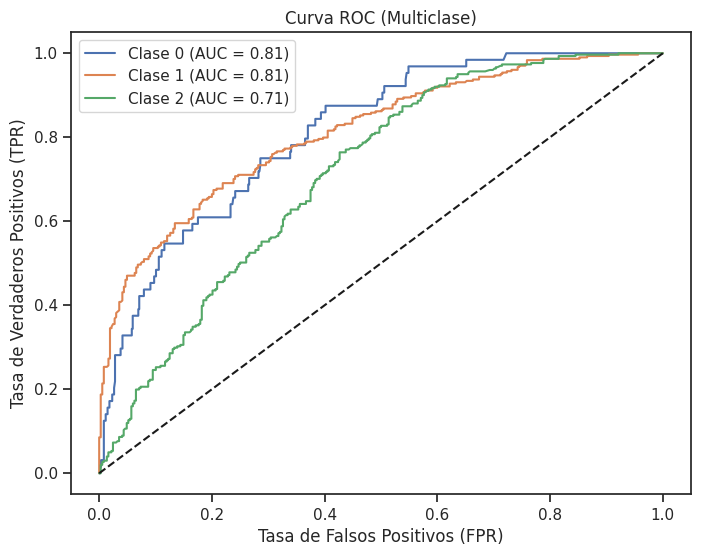

In [63]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarizar las etiquetas para multiclase
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Calcular puntuaciones para cada clase
y_score = best_clf.predict_proba(X_test_scaled)

# Calcular curva ROC y AUC para cada clase
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (Multiclase)')
plt.legend()
plt.show()